# ***Basketball Dataset Description:***

The dataset contains information about basketball games, including game date, teams involved, final scores and other relevant variables. Each row represents a single basketball game, with details such as the date of the game, the teams playing, the final score, and various betting lines. The dataset provides an opportunity to explore and analyze basketball game outcomes, investigate factors affecting game results, and potentially build predictive models to forecast game outcomes.




<img src="Basketball.jpg" alt="Basketball Image" style="max-width:100%;">


## **Problem Statement: Predicting Basketball Game Outcomes**

**Objective:**
Develop a predictive model to accurately predict basketball game outcomes based on the provided dataset.


### **Column Descriptions:**

- **Date:** The date when the game took place.
- **Rot:** Rotation number.
- **VH:** Indicates whether the team is playing at home (H) or away (V).
- **Team:** Name of the basketball team.
- **Pitcher:** Name of the pitcher.
- **Open:** The opening betting line for the game.
- **Close:** The closing betting line for the game.
- **1st-9th:** Scores for each inning.
- **Final:** The final score of the game.



In [167]:
# Importing necessary libraries for data analysis and visualization

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm


In [168]:
# Reading an Excel file

data=pd.read_excel('Basketball.xlsx')


In [169]:
# let us make another copy of data

df = data.copy()


In [4]:
# Displaying the first few rows of the Data

df.head()


,Date,Rot,VH,Team,Pitcher,Open,Close,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,Final
0,2021-02-04,961,V,PIT,CKUHL,183,190,2,1,0,0,1,0,1,0,0,5
1,2021-02-04,962,H,CUB,KHENDRICK,-205,-210,1,0,1,0,0,0,0,1,0,3
2,2021-02-04,963,V,ATL,MFRIED-L,-105,117,0,0,0,0,0,0,2,0,0,2
3,2021-02-04,964,H,PHI,ANOLA,-105,-127,1,0,1,0,0,0,0,0,0,3
4,2021-02-04,965,V,ARI,MBUMGARNE-L,188,205,1,0,0,0,6,0,0,0,0,7


Lets have a look at column names

In [5]:
# Retrieving the column names of the Data

df.columns


Index(['Date', 'Rot', 'VH', 'Team', 'Pitcher', 'Open', 'Close', '1st', '2nd',
       '3rd', '4th', '5th', '6th', '7th', '8th', '9th', 'Final'],
      dtype='object')

Checking the numbers of rows and columns

In [6]:
# Retrieving the dimensions (number of rows and columns) of the Data

df.shape


(4924, 17)

<font color = "black" size = 3>Observations</font>



* The dataset comprises 4924 rows and 17 columns.








Checking column type and missing values

In [7]:
# Displaying concise information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4924 entries, 0 to 4923
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     4924 non-null   datetime64[ns]
 1   Rot      4924 non-null   int64         
 2   VH       4924 non-null   object        
 3   Team     4924 non-null   object        
 4   Pitcher  4924 non-null   object        
 5   Open     4924 non-null   int64         
 6   Close    4924 non-null   int64         
 7   1st      4924 non-null   int64         
 8   2nd      4924 non-null   int64         
 9   3rd      4924 non-null   int64         
 10  4th      4924 non-null   int64         
 11  5th      4924 non-null   int64         
 12  6th      4924 non-null   object        
 13  7th      4924 non-null   object        
 14  8th      4924 non-null   object        
 15  9th      4924 non-null   object        
 16  Final    4924 non-null   int64         
dtypes: datetime64[ns](1), int64(9), o

<font color = "black" size = 3>Observations</font>

* The DataFrame contains 4924 entries (rows).
* There are 17 columns in total.
* The data types of the columns include:
  * 1 column with datetime64 data type (`Date`).
  * 9 columns with int64 data type (`Rot`, `Open`, `Close`, `1st`, `2nd`, `3rd`, `4th`, `5th`, `Final`).
  * 7 columns with object data type (`VH`, `Team`, `Pitcher`, `6th`, `7th`, `8th`, `9th`).
* All columns have non-null values, indicating that there are no missing values in the dataset.
* The memory usage of the DataFrame is approximately 654.1 KB, which provides an indication of the memory required to store the DataFrame in memory.
* The `VH` column likely contains categorical data, as indicated by its object data type.
* The `Date` column appears to contain datetime information, which may be useful for time-series analysis or temporal data exploration.

Checking Null Values 

In [8]:
df.isna().sum()

Date       0
Rot        0
VH         0
Team       0
Pitcher    0
Open       0
Close      0
1st        0
2nd        0
3rd        0
4th        0
5th        0
6th        0
7th        0
8th        0
9th        0
Final      0
dtype: int64

<font color = "black" size = 3>Observations</font>

* There are no null values in dataset

Check the unique values in each column of the dataframe.

In [9]:
df.nunique()

Date       206
Rot         82
VH           2
Team        30
Pitcher    400
Open       178
Close      303
1st         12
2nd         10
3rd         11
4th         10
5th         10
6th         10
7th         12
8th         12
9th          9
Final       23
dtype: int64

<font color = "black" size = 3>Observations</font>

* The `Date` column has 206 unique values.
* The `Rot` column has 82 unique values.
* The `VH` column has 2 unique values, indicating that it likely represents a binary categorical variable.
* The `Team` column has 30 unique values.
* The `Pitcher` column has 400 unique values, suggesting a wide variety of pitchers.
* The `Open` column has 178 unique values.
* The `Close` column has 303 unique values.
* The `1st`, `2nd`, `3rd`, `4th`, `5th`, `6th`, `7th`, `8th`, and `9th` columns each have relatively low numbers of unique values, ranging from 9 to 12. These columns likely represent categorical variables with a limited number of categories or levels.

### Statistical Summary

In [10]:
# For Numeric Columns
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,4924,2021-11-08 13:04:55.369618432,2021-02-04 00:00:00,2021-06-01 00:00:00,2021-12-03 00:00:00,2022-03-31 00:00:00,2023-01-06 00:00:00,NaN
Rot,4924.000,940.615,901.000,915.000,951.000,965.000,992.000,26.667
Open,4924.000,-25.739,-2300.000,-150.000,-110.000,130.000,1124.000,157.777
Close,4924.000,-13.055,-400.000,-145.000,-105.000,135.000,330.000,156.463
1st,4924.000,0.555,0.000,0.000,0.000,1.000,11.000,1.083
2nd,4924.000,0.461,0.000,0.000,0.000,0.000,11.000,1.006
3rd,4924.000,0.525,0.000,0.000,0.000,1.000,10.000,1.058
4th,4924.000,0.519,0.000,0.000,0.000,1.000,9.000,1.048
5th,4924.000,0.516,0.000,0.000,0.000,1.000,9.000,1.033
Final,4924.000,4.524,0.000,2.000,4.000,6.000,24.000,3.187


In [11]:
# For Categorical Columns
df.describe(include='object').T

,count,unique,top,freq
VH,4924,2,V,2462
Team,4924,30,HOU,178
Pitcher,4924,400,JGRAY,42
6th,4924,10,0,3516
7th,4924,12,0,3615
8th,4924,12,0,3436
9th,4924,9,0,2682


<font color = "black" size = 3>Observations</font>

Numerical Columns:
* `Rot`: 
  * Mean: 940.615, indicating that the average rotation number is around 940.
  * Range: From 901 to 992.
  * Standard deviation: 26.667, suggesting low variability around the mean.

* `Open` and `Close`:
  * Both columns show negative values, with the `Open` column having a wider range than the `Close` column.
  * Both columns have similar means and standard deviations.

* `1st`, `2nd`, `3rd`, `4th`, and `5th`:
  * These columns represent categorical variables with binary values (0 or 1), as indicated by the mean values close to 0.5.
  * The maximum values for each column suggest some outliers beyond the binary range.

* `Final`:
  * Mean: 4.524, indicating an average final value of around 4.5.
  * Range: From 0 to 24.
  * Standard deviation: 3.187, suggesting moderate variability around the mean.

Categorical Columns:
* `VH`:
  * 2462 instances of "V" and 2462 instances of "H".
  * Indicates home and away teams or venues.

* `Team`:
  * 30 unique teams with different frequencies.
  * Most frequent team is "HOU" (Houston) with 178 occurrences.

* `Pitcher`, `6th`, `7th`, `8th`, `9th`:
  * `Pitcher` column has 400 unique values with different frequencies.
  * Columns `6th`, `7th`, `8th`, and `9th` have various levels or categories represented by integers ranging from 0 to 11, each with different frequencies.

Checking unique values of every categorical columns

In [12]:
# Select only object columns
object_columns = df.select_dtypes(include='object').columns

# Display unique values for each object column
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")
    print()

Unique values for VH: ['V' 'H']

Unique values for Team: ['PIT' 'CUB' 'ATL' 'PHI' 'ARI' 'SDG' 'LAD' 'COL' 'STL' 'CIN' 'TOR' 'NYY'
 'CLE' 'DET' 'TEX' 'KAN' 'CWS' 'LAA' 'HOU' 'OAK' 'MIN' 'MIL' 'TAM' 'MIA'
 'SFO' 'SEA' 'BAL' 'BOS' 'NYM' 'WAS']

Unique values for Pitcher: ['CKUHL' 'KHENDRICK' 'MFRIED-L' 'ANOLA' 'MBUMGARNE-L' 'YDARVISH'
 'CKERSHAW-L' 'GMARQUEZ' 'JFLAHERTY' 'LCASTILLO' 'HRYU-L' 'GCOLE'
 'SBIEBER' 'MBOYD-L' 'KGIBSON' 'BKELLER' 'LGIOLITO' 'DBUNDY' 'ZGREINKE'
 'CBASSITT' 'KMAEDA' 'BWOODRUFF' 'TGLASNOW' 'SALCANTAR' 'KGAUSMAN'
 'MGONZALES-L' 'TBAUER' 'ASENZATEL' 'MKELLY' 'BSNELL-L' 'DKEUCHEL-L'
 'AHEANEY-L' 'CJAVIER' 'JLUZARDO-L' 'RYARBROUG-L' 'PLOPEZ' 'JCUETO'
 'YKIKUCHI-L' 'JMEANS-L' 'NEOVALDI' 'TANDERSON-L' 'JARRIETA' 'CMORTON'
 'ZWHEELER' 'AWAINWRIG' 'TMAHLE' 'WBUEHLER' 'JGRAY' 'CSMITH-L' 'JMUSGROVE'
 'RSTRIPLIN' 'CKLUBER' 'ZPLESAC' 'JTEHERAN' 'MHARVEY' 'THOUCK' 'KARIHARA'
 'MMINOR-L' 'LMCCULLER' 'CIRVIN-L' 'LLYNN' 'ACOBB' 'RHILL-L' 'EHERNANDE'
 'JBERRIOS' 'CBURNES' 'LWEBB' '

<font color = "black" size = 3>Observations</font>

- The `VH` column has two unique values: 'V' and 'H', indicating whether the team is playing at home ('H') or away ('V').
- The `Team` column contains names of different baseball teams.
- The `Pitcher` column consists of names of different pitchers.
- The `6th`, `7th`, `8th`, and `9th` columns contain numerical values ranging from 0 to 10, with the additional value 'x' appearing in some rows.

Solution:
- For the `6th`, `7th`, `8th`, and `9th` columns, the value 'x' seems to represent missing or unknown data. To handle this:
  - Replace the 'x' values with NaN (missing values).
  - Then, fill the missing values using an appropriate method, such as mean, median, or mode imputation, depending on the distribution of the data and the context of the analysis.


Converting numeric columns whos datatype is object

In [53]:

# Replace 'x' with NaN in the specified columns

cols_to_convert = ['6th', '7th', '8th', '9th']
df[cols_to_convert] = df[cols_to_convert].replace('x', pd.NA)

# Convert the specified columns to numerical type

df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric)

# Fill NaN values in the specified columns with 0
df[cols_to_convert] = df[cols_to_convert].fillna(0)


### Data Visualisation

Text(0, 0.5, 'Values')

<Figure size 800x600 with 0 Axes>

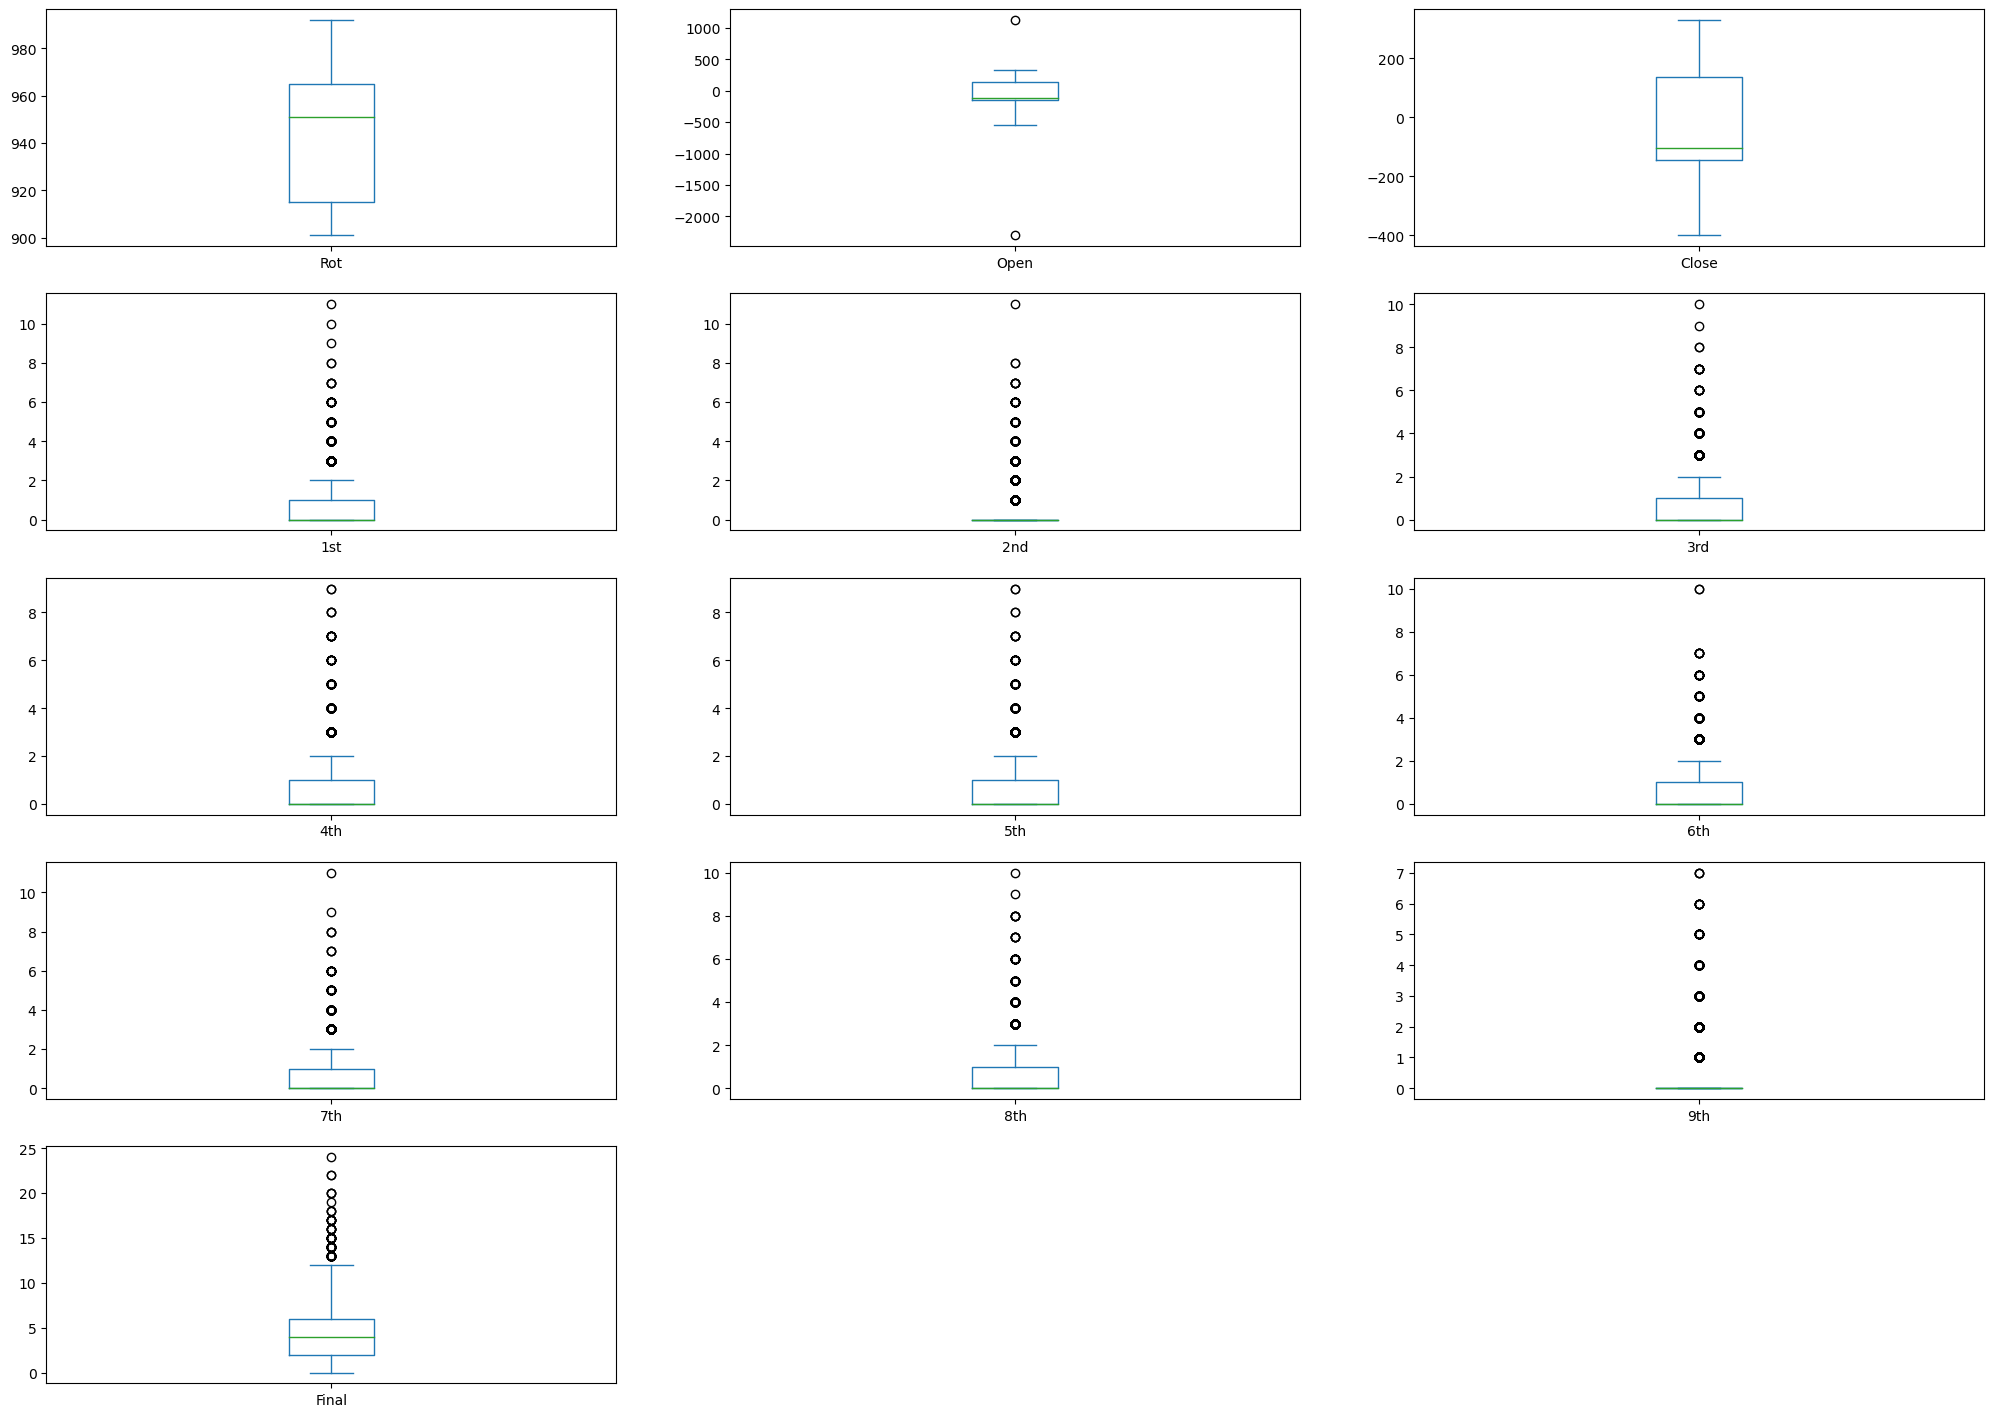

In [14]:
# Melt the DataFrame to create boxplots for each column
melted_df = df.melt()

# Create multiple boxplots using Seaborn
plt.figure(figsize=(8, 6))
# Using Pandas to create multiple boxplots
boxplot = df.plot(kind='box',subplots=True, layout=(11,3), sharex=False, sharey=False, figsize=(25,40))
plt.xlabel('Columns')
plt.ylabel('Values')

<font color = "black" size = 3>Observations</font>

- The `Rot` , `Close` column has no outliers.
- The `Open` column contains ouliers which can be handle with IQR.
- The `1st`, `2nd`, `3rd`, `4th`, `5th`, `6th`, `7th`, `8th`,`9th` and `Final` columns contain ouliers which represent valid and genuine data points that reflect the natural variablity in the dataset removing them might lead to the loss of valuable information.

In [54]:
from scipy.stats.mstats import winsorize

# Define the lower and upper bounds for winsorization (e.g., 5th and 95th percentiles)
lower_bound = df['Open'].quantile(0.05)
upper_bound = df['Open'].quantile(0.95)

# Winsorize the 'Open' column to replace outliers with values at the specified percentiles
df['Open'] = winsorize(df['Open'], limits=(0.05, 0.05))


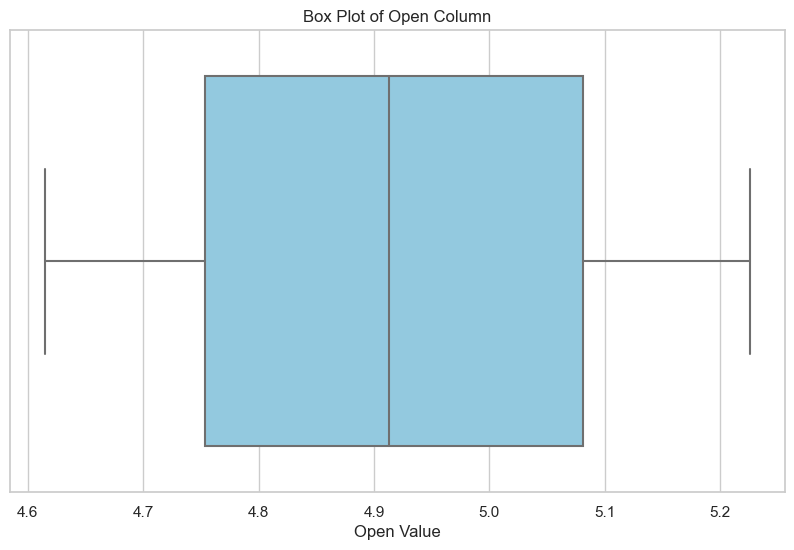

In [34]:

# Create box plot for the 'Open' column

plt.figure(figsize=(10, 6))
sns.boxplot(x='Open', data=df, color='skyblue')

plt.title('Box Plot of Open Column')
plt.xlabel('Open Value')
plt.show()


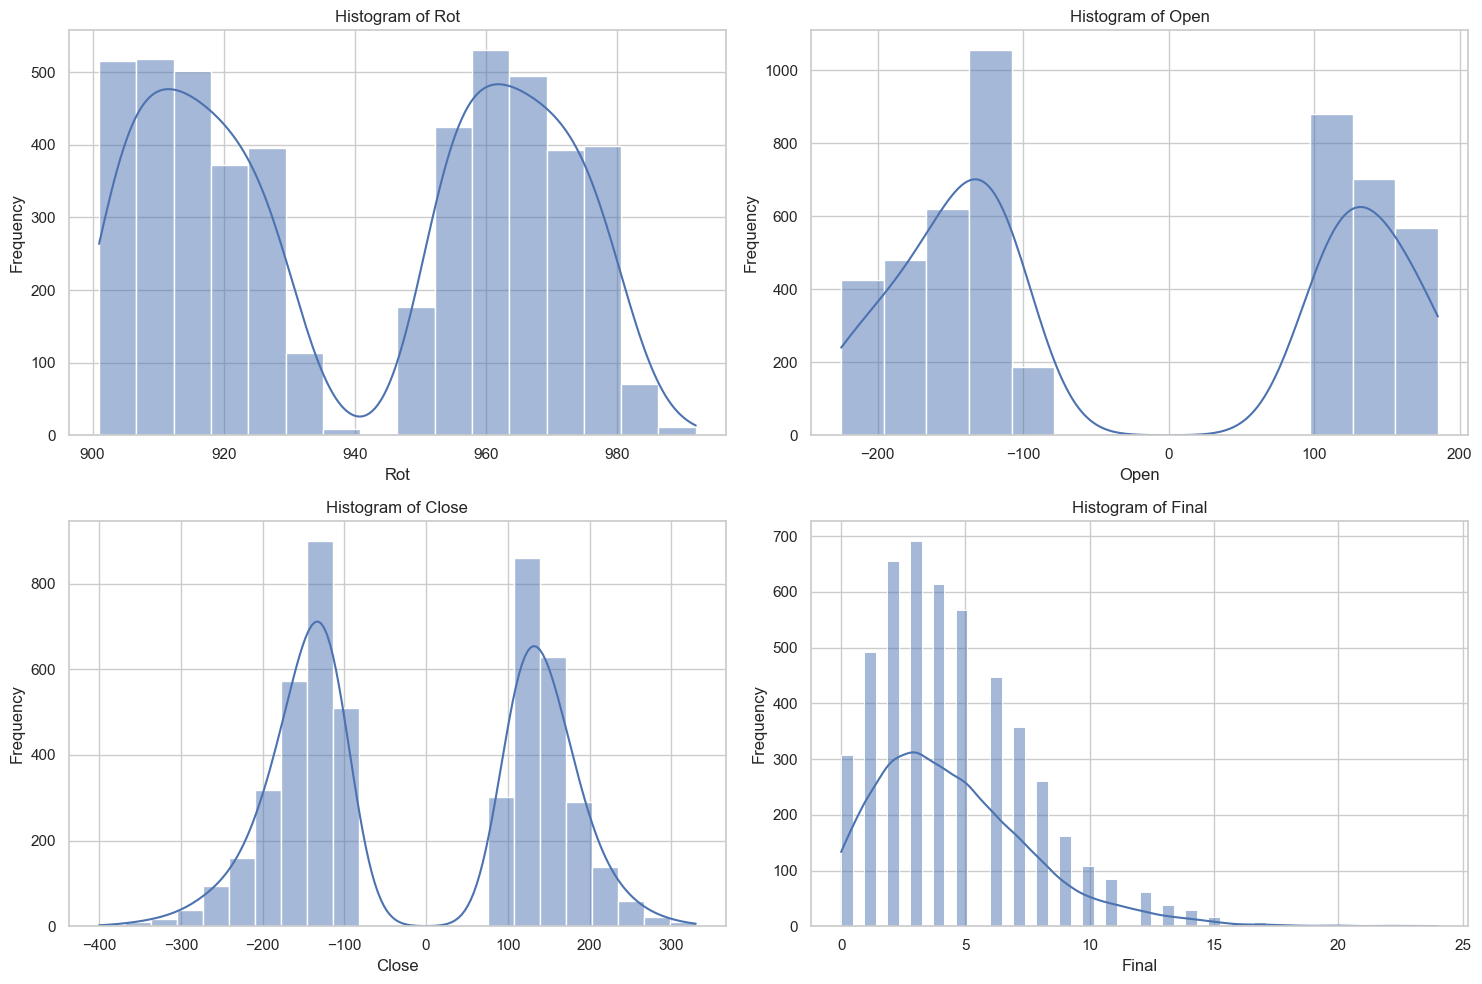

In [55]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Specify the columns to plot
columns_to_plot = ['Rot', 'Open', 'Close', 'Final']

# Create subplots for each column with a larger figure size
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(15, 10))

# Plot histograms for selected columns
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Histogram of {column}')
    axes[i // 2, i % 2].set_xlabel(column)
    axes[i // 2, i % 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


<font color = "black" size = 3>Observations</font>

- None of the columns are normally distributed

#### Normalizing the columns

In [56]:

# Select numerical columns
numerical_columns = ['Rot', 'Open', 'Close','Final']

# Convert selected columns to numeric data type
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Apply log transformation to numerical columns
df[numerical_columns] = np.log1p(df[numerical_columns])


Handling categorical columns

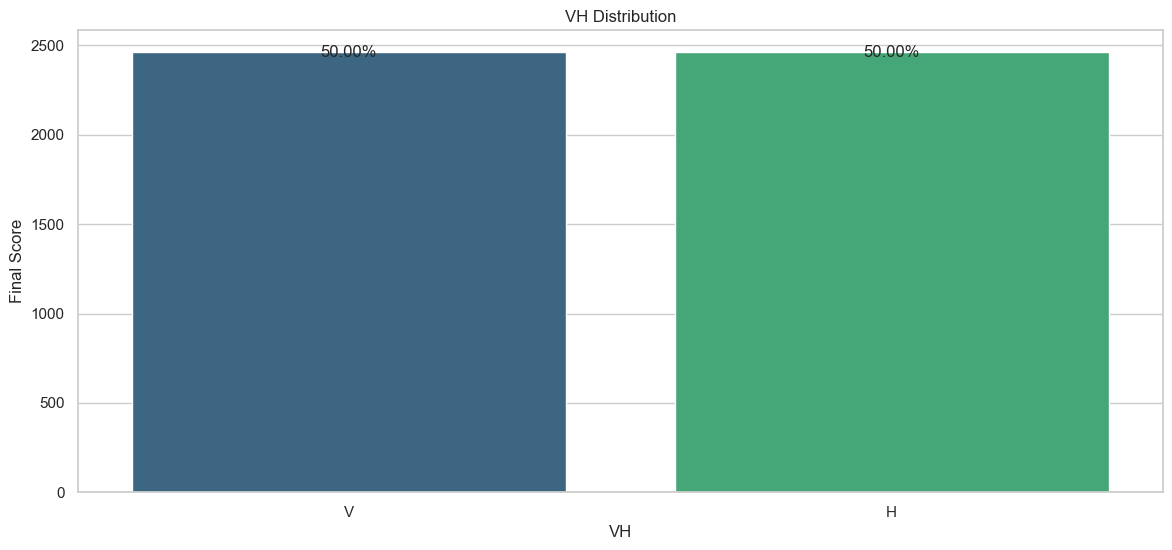

In [172]:
# Calculate total count
total = len(df)

# Plot a bar graph for the 'VH' column
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='VH', data=df, palette='viridis')

# Add percentage labels inside each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total * 100:.2f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center')

plt.title('VH Distribution')
plt.xlabel('VH')
plt.ylabel('Final Score')
plt.show()


<font color = "black" size = 3>Observations</font>

- This count plot shows that the Final score of games while the game is in home town(H) or Away(V).
- The distribution of the count plot of V and H is 50%-50%.
- It does not effect the final score of the game if the game is in the Home town(H) or away(A).

In [70]:
# Assuming df is your DataFrame

# Define mapping dictionary
vh_mapping = {'V': 0, 'H': 1}

# Replace values in 'VH' column using the mapping dictionary
df['VH'].replace(vh_mapping, inplace=True)


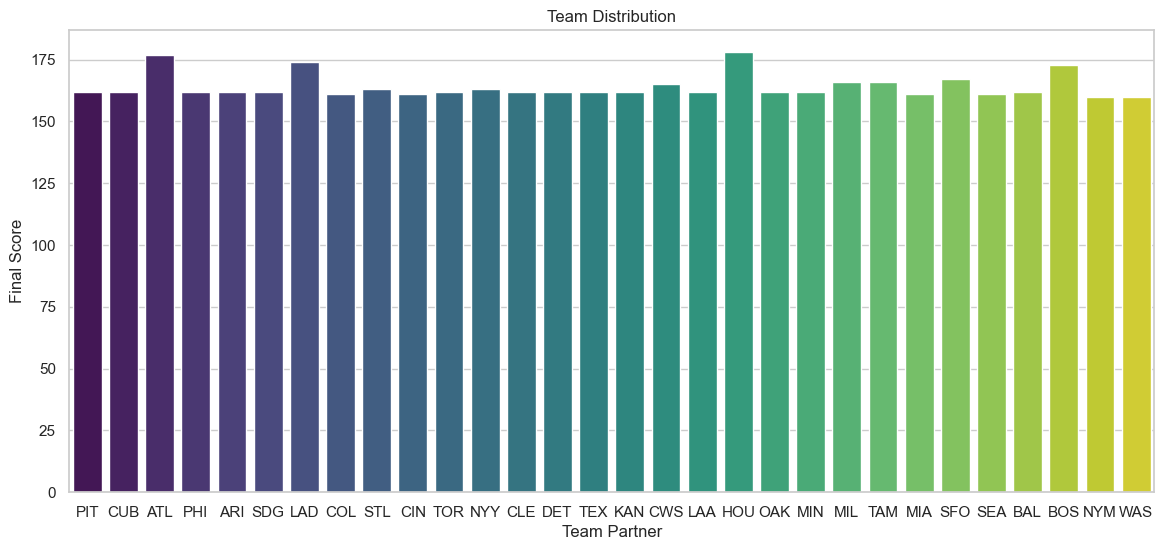

In [171]:

# Plot a bar graph for the 'Team' column

plt.figure(figsize=(14, 6))
sns.countplot(x='Team', data=df, palette='viridis')
plt.title('Team Distribution')
plt.xlabel('Team Partner')
plt.ylabel('Final Score')
plt.show()


<font color = "black" size = 3>Observations</font>

- This count plot shows that the count of the teams to the final score.
- Some teams like `ATL`and `HOU` has above 175 final score.
- Also teams like `LAD` and`BOS` are in the race to the top.

In [58]:

# Modify team mapping to have only two categories: AL and NL

team_mapping = {
    'AL': ['BOS', 'NYY', 'TOR', 'TAM', 'BAL', 'CWS', 'MIN', 'CLE', 'DET', 'KAN', 'HOU', 'OAK', 'SEA', 'LAA', 'TEX'],
    'NL': ['ATL', 'NYM', 'PHI', 'MIA', 'WAS', 'STL', 'CIN', 'MIL', 'CHC', 'PIT', 'LAD', 'SFO', 'SDG', 'ARI', 'COL']
}

# Replace team names with broader categories

for category, teams in team_mapping.items():
    df['Team'].replace(teams, category, inplace=True)



In [59]:
# Perform one-hot encoding for the modified 'Team' column
df = pd.get_dummies(df, columns=['Team'], prefix='Team')

In [61]:
# Manually replace True and False with 1 and 0 across the entire DataFrame
df = df.replace({True: 1, False: 0})

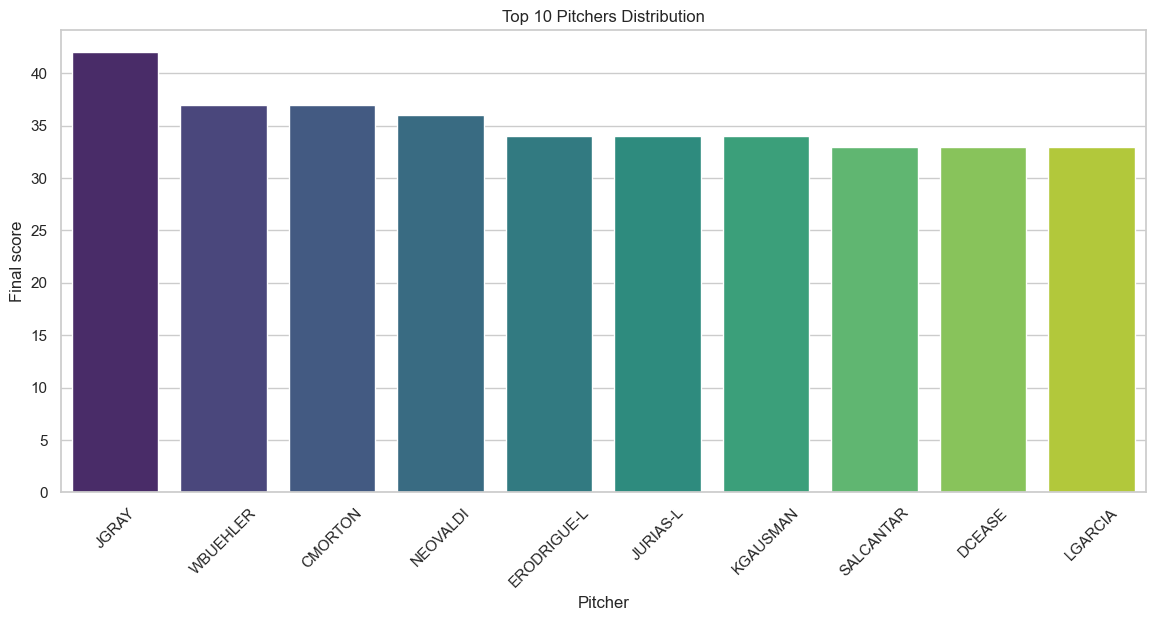

In [173]:
# Get the top 10 pitchers based on their frequency
top_pitchers = df['Pitcher'].value_counts().head(10).index

# Filter the dataframe to include only the top 10 pitchers
df_top_pitchers = df[df['Pitcher'].isin(top_pitchers)]

# Plot a bar graph for the top 10 pitchers
plt.figure(figsize=(14, 6))
sns.countplot(x='Pitcher', data=df_top_pitchers, palette='viridis', order=top_pitchers)
plt.title('Top 10 Pitchers Distribution')
plt.xlabel('Pitcher')
plt.ylabel('Final score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


<font color = "black" size = 3>Observations</font>

- This count plot shows that which picher has max distribution in final score.
- JGRAY is the best pitcher who scores the above 40 for his team.

In [64]:

# Group pitchers by handedness (left-handed vs right-handed)
df['Pitcher'] = df['Pitcher'].apply(lambda x: 'Left-Handed' if x.endswith('-L') else 'Right-Handed')


In [66]:

# Create dummy variables for the 'Pitcher' column
df = pd.get_dummies(df, columns=['Pitcher'], prefix='Pitcher')


In [68]:
# Manually replace True and False with 1 and 0 across the entire DataFrame
df = df.replace({True: 1, False: 0})

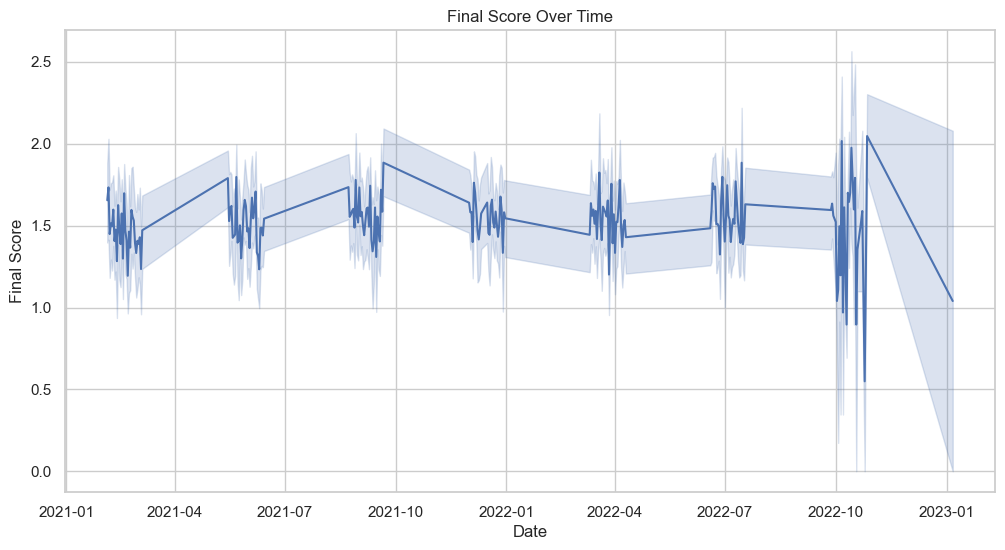

In [71]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Final', data=df)
plt.title('Final Score Over Time')
plt.xlabel('Date')
plt.ylabel('Final Score')
plt.show()


<font color = "black" size = 3>Observations</font>

- The line plot depicts the fluctuation in final scores over time, suggesting variations in performance. It shows trends, seasonality.

In [72]:

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the 'Date' column
df.drop(columns=['Date'], inplace=True)


In [76]:
# Fill NaN values with median
df.fillna(df.median(), inplace=True)


Correlation

In [77]:
correlation = df.corr()
correlation

,Rot,VH,Open,Close,1st,2nd,3rd,4th,5th,6th,...,9th,Final,Team_AL,Team_CUB,Team_NL,Pitcher_Left-Handed,Pitcher_Right-Handed,Year,Month,Day
Rot,1.000,0.019,-0.005,0.001,0.010,0.018,-0.002,0.028,0.002,-0.002,...,-0.022,-0.003,0.182,-0.049,-0.165,0.020,-0.020,-0.021,-0.012,0.011
VH,0.019,1.000,-0.108,-0.139,0.047,0.036,0.023,0.046,0.014,0.026,...,-0.146,0.027,-0.000,-0.000,0.000,-0.007,0.007,-0.000,-0.000,-0.000
Open,-0.005,-0.108,1.000,0.743,-0.042,-0.022,-0.012,-0.026,-0.014,-0.006,...,-0.008,-0.052,-0.002,0.009,-0.001,-0.007,0.007,0.140,-0.047,-0.012
Close,0.001,-0.139,0.743,1.000,-0.060,-0.028,-0.023,-0.019,-0.029,-0.032,...,0.000,-0.066,-0.012,0.024,0.003,-0.004,0.004,0.126,-0.045,-0.003
1st,0.010,0.047,-0.042,-0.060,1.000,0.064,0.014,0.010,-0.002,0.014,...,-0.017,0.336,-0.018,-0.005,0.020,-0.001,0.001,-0.004,0.026,0.015
2nd,0.018,0.036,-0.022,-0.028,0.064,1.000,0.023,0.007,0.030,0.003,...,-0.014,0.319,0.021,0.000,-0.022,0.004,-0.004,-0.003,-0.011,0.008
3rd,-0.002,0.023,-0.012,-0.023,0.014,0.023,1.000,-0.001,0.037,0.011,...,-0.013,0.327,0.030,0.006,-0.032,0.005,-0.005,0.014,0.001,0.006
4th,0.028,0.046,-0.026,-0.019,0.010,0.007,-0.001,1.000,0.033,0.017,...,-0.054,0.321,0.028,-0.003,-0.027,0.003,-0.003,0.019,0.019,0.015
5th,0.002,0.014,-0.014,-0.029,-0.002,0.030,0.037,0.033,1.000,0.025,...,-0.011,0.330,0.013,-0.002,-0.012,0.016,-0.016,0.015,-0.004,0.013
6th,-0.002,0.026,-0.006,-0.032,0.014,0.003,0.011,0.017,0.025,1.000,...,-0.017,0.320,0.022,-0.016,-0.016,0.007,-0.007,-0.018,0.024,0.005


<Axes: >

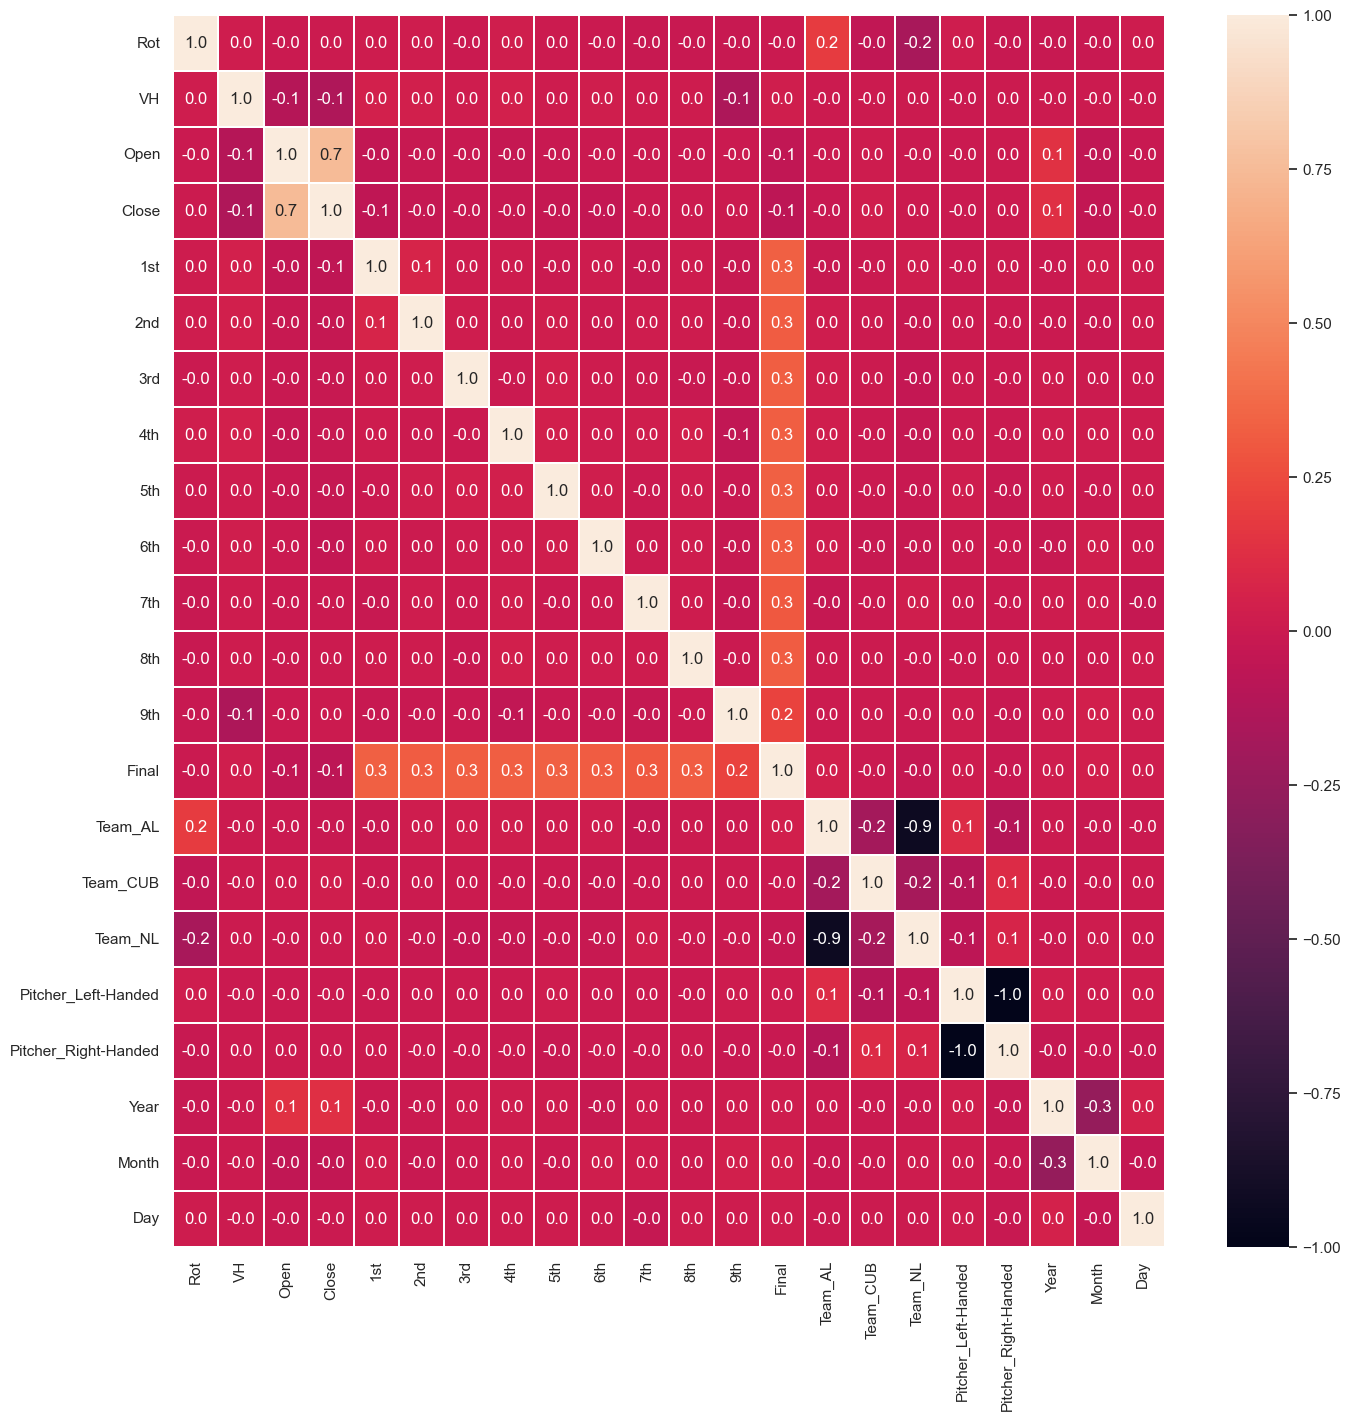

In [78]:
#correlation map
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, linewidths=.3, fmt= '1.0001f',ax=ax)

<font color = "black" size = 3>Observations</font>


- There is a moderately positive correlation between 'Open' and 'Close' columns, indicating that the opening and closing scores are somewhat positively related.
- The '1st', '2nd', '3rd', '4th', and '5th' quarters show positive correlations with each other, suggesting consistency or momentum throughout the game.
- 'Team_AL' and 'Team_NL' exhibit a negative correlation, which is expected since they represent different leagues.
- There are negligible correlations between 'Pitcher_Left-Handed' and 'Pitcher_Right-Handed', indicating that the pitcher's dominant hand does not significantly affect other variables.
- The year shows a slight negative correlation with 'Team_AL' and 'Team_NL', implying a subtle change in the composition of teams over time.
- There is a weak negative correlation between 'Year' and 'Month', indicating a slight decrease in the month number as the years progress.
- 'Year' and 'Day' columns have a very weak negative correlation, suggesting a slight decrease in the day of the month as the years progress.


In [79]:
df.head()

,Rot,VH,Open,Close,1st,2nd,3rd,4th,5th,6th,...,9th,Final,Team_AL,Team_CUB,Team_NL,Pitcher_Left-Handed,Pitcher_Right-Handed,Year,Month,Day
0,6.869,0,5.215,5.252,2,1,0,0,1,0.000,...,0.000,1.792,0,0,1,0,1,2021,2,4
1,6.870,1,4.913,4.942,1,0,1,0,0,0.000,...,0.000,1.386,0,1,0,0,1,2021,2,4
2,6.871,0,4.913,4.771,0,0,0,0,0,0.000,...,0.000,1.099,0,0,1,1,0,2021,2,4
3,6.872,1,4.913,4.942,1,0,1,0,0,0.000,...,0.000,1.386,0,0,1,0,1,2021,2,4
4,6.873,0,5.226,5.328,1,0,0,0,6,0.000,...,0.000,2.079,0,0,1,1,0,2021,2,4


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4924 entries, 0 to 4923
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rot                   4924 non-null   float64
 1   VH                    4924 non-null   int64  
 2   Open                  4924 non-null   float64
 3   Close                 4924 non-null   float64
 4   1st                   4924 non-null   int64  
 5   2nd                   4924 non-null   int64  
 6   3rd                   4924 non-null   int64  
 7   4th                   4924 non-null   int64  
 8   5th                   4924 non-null   int64  
 9   6th                   4924 non-null   float64
 10  7th                   4924 non-null   float64
 11  8th                   4924 non-null   float64
 12  9th                   4924 non-null   float64
 13  Final                 4924 non-null   float64
 14  Team_AL               4924 non-null   int64  
 15  Team_CUB             

#### creating Dependant and independant variables

In [81]:
X=df.drop(["Final"],axis=1)
y=df[["Final"]]


In [82]:
print(X.shape)
print(y.shape)

(4924, 21)
(4924, 1)


##### Test train split

In [83]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [84]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3446, 21)
(1478, 21)
(3446, 1)
(1478, 1)


### Model Building

In [85]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)  

LinearRegression()

In [86]:
print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCoefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_train)

Intercept of the linear equation: [-16.41951597]

Coefficients of the equation are: [[-1.78181053e-01 -1.75516364e-03 -9.42898663e-02  1.74053664e-02
   1.82278376e-01  1.71890497e-01  1.85109143e-01  1.79961866e-01
   1.77167015e-01  1.86258170e-01  1.93723600e-01  1.73166035e-01
   1.98520313e-01 -2.51041775e-03  1.02840398e-02 -7.77362204e-03
  -4.48674227e-03  4.48674227e-03  9.27252863e-03 -2.53339155e-05
  -7.15306609e-05]]


### Model performances

In [87]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [88]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
sklmodel_train_perf = model_performance_regression(linearregression, X_train, y_train)
sklmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.276,0.190,0.818,0.817,inf


In [89]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(linearregression, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.270,0.186,0.817,0.815,inf


In [90]:
# Lets us build linear regression model using statsmodel 

x = sm.add_constant(X)
x_train1, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, x_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Final   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     810.3
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:10:36   Log-Likelihood:                -448.93
No. Observations:                3446   AIC:                             937.9
Df Residuals:                    3426   BIC:                             1061.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.9561 

<font size = 4>Observation </font>

P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) than any variable with p-values less than 0.05 would be considered significant.
Negative values of coefficient shows that, Life expectancy deceases with their increase.
Positive values of coefficient shows that, Life expectancy inceases with their increase.
But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values

<font size = 4>Interpreting the Regression Results </font>



1   Adjusted. R-squared: It reflects the fit of the model.



*   R-squared values range from 0 to 1, where a higher value generally
   indicates a better fit, assuming certain conditions are met.
* In our case, the value for Adj. R-squared is 0.55, which is okay!



2   Const coefficient is the Y-intercept.

*   It means that if all the dependent variables (features: like age, fuel, year of driving experiance and so on..) coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.






3   Std err: It reflects the level of accuracy of the coefficients.



*   The lower it is, the higher is the level of accuracy.



4    P >|t|: It is p-value
*   Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis

    Ho : Independent feature is not significant

    Ha : Independent feature is that it is significant



*   Pr(>|t|) gives P-value for each independent feature to check that null hypothesis. we are considering 0.05 (5%) as significance level

*   A p-value of less than 0.05 is considered to be statistically significant.








<br/>
<font size = 5>Test of Multicolinearity </font>


In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(x.values,i) for i in range(x.shape[1])],index=x.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                  0.000
Rot                    1.038
VH                     1.048
Open                   2.252
Close                  2.269
1st                    1.011
2nd                    1.009
3rd                    1.005
4th                    1.011
5th                    1.006
6th                    1.005
7th                    1.005
8th                    1.003
9th                    1.029
Team_AL                  inf
Team_CUB                 inf
Team_NL                  inf
Pitcher_Left-Handed      inf
Pitcher_Right-Handed     inf
Year                   1.095
Month                  1.074
Day                    1.006
dtype: float64



In [94]:
# we drop the one with the highest vif values and check the multicolinearity again
x_train2 = x_train1.drop('Team_AL', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(x_train2.values,i) for i in range(x_train2.shape[1])],index=x_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                  0.000
Rot                    1.037
VH                     1.051
Open                   2.172
Close                  2.184
1st                    1.016
2nd                    1.012
3rd                    1.008
4th                    1.014
5th                    1.008
6th                    1.005
7th                    1.007
8th                    1.004
9th                    1.033
Team_CUB               1.050
Team_NL                1.072
Pitcher_Left-Handed      inf
Pitcher_Right-Handed     inf
Year                   1.105
Month                  1.082
Day                    1.011
dtype: float64



In [95]:
# we drop the one with the highest vif values and check the multicolinearity again
x_train3 = x_train2.drop('Pitcher_Left-Handed', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(x_train3.values,i) for i in range(x_train3.shape[1])],index=x_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                  19448095.963
Rot                           1.037
VH                            1.051
Open                          2.172
Close                         2.184
1st                           1.016
2nd                           1.012
3rd                           1.008
4th                           1.014
5th                           1.008
6th                           1.005
7th                           1.007
8th                           1.004
9th                           1.033
Team_CUB                      1.050
Team_NL                       1.072
Pitcher_Right-Handed          1.021
Year                          1.105
Month                         1.082
Day                           1.011
dtype: float64



In [96]:
olsmod1 = sm.OLS(y_train, x_train3)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Final   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     810.3
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:14:55   Log-Likelihood:                -448.93
No. Observations:                3446   AIC:                             937.9
Df Residuals:                    3426   BIC:                             1061.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -16.4265 

<font size = 4> Significance Test </font>

<font size = 3>Let's drop the variables which has highest p value among all with p value greater than 0.05</font>

In [97]:
x_train4 = x_train3.drop(['Month'], axis=1)

In [99]:
olsmod3 = sm.OLS(y_train, x_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Final   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     855.6
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:16:20   Log-Likelihood:                -448.93
No. Observations:                3446   AIC:                             935.9
Df Residuals:                    3427   BIC:                             1053.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -16.5191 

In [102]:
x_train5 = x_train4.drop(['Day'], axis=1)

In [104]:
olsmod4 = sm.OLS(y_train, x_train5)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Final   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     906.1
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:17:49   Log-Likelihood:                -448.94
No. Observations:                3446   AIC:                             933.9
Df Residuals:                    3428   BIC:                             1044.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -16.3621 

In [105]:
x_train6 = x_train5.drop(['Open'], axis=1)

In [106]:
olsmod5 = sm.OLS(y_train, x_train6)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Final   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     962.0
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:19:14   Log-Likelihood:                -450.49
No. Observations:                3446   AIC:                             935.0
Df Residuals:                    3429   BIC:                             1039.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -13.7625 

In [108]:
x_train7 = x_train6.drop(['VH'], axis=1)

In [109]:
olsmod6 = sm.OLS(y_train, x_train7)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Final   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1026.
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:20:51   Log-Likelihood:                -450.51
No. Observations:                3446   AIC:                             933.0
Df Residuals:                    3430   BIC:                             1031.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -13.6584 

In [110]:
x_train8 = x_train7.drop(['Team_CUB'], axis=1)

In [111]:
olsmod7 = sm.OLS(y_train, x_train8)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Final   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1100.
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:22:33   Log-Likelihood:                -450.62
No. Observations:                3446   AIC:                             931.2
Df Residuals:                    3431   BIC:                             1023.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -13.6607 

In [112]:
x_train9 = x_train8.drop(['Team_NL'], axis=1)

In [113]:
olsmod8 = sm.OLS(y_train, x_train9)
olsres8 = olsmod8.fit()
print(olsres8.summary())

                            OLS Regression Results                            
Dep. Variable:                  Final   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1185.
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:23:40   Log-Likelihood:                -450.81
No. Observations:                3446   AIC:                             929.6
Df Residuals:                    3432   BIC:                             1016.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -13.8496 

In [114]:
x_train10 = x_train9.drop(['Year'], axis=1)

In [115]:
olsmod9 = sm.OLS(y_train, x_train10)
olsres9 = olsmod9.fit()
print(olsres9.summary())

                            OLS Regression Results                            
Dep. Variable:                  Final   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1284.
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:24:37   Log-Likelihood:                -451.13
No. Observations:                3446   AIC:                             928.3
Df Residuals:                    3433   BIC:                             1008.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.0005 

In [116]:
x_train11 = x_train10.drop(['Pitcher_Right-Handed'], axis=1)

In [117]:
olsmod10 = sm.OLS(y_train, x_train11)
olsres10 = olsmod10.fit()
print(olsres10.summary())

                            OLS Regression Results                            
Dep. Variable:                  Final   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1400.
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:25:35   Log-Likelihood:                -451.50
No. Observations:                3446   AIC:                             927.0
Df Residuals:                    3434   BIC:                             1001.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0072      1.148      1.748      0.0

In [119]:
x_train12 = x_train11.drop(['Rot'], axis=1)

In [120]:
olsmod11 = sm.OLS(y_train, x_train12)
olsres11 = olsmod11.fit()
print(olsres11.summary())

                            OLS Regression Results                            
Dep. Variable:                  Final   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1540.
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:26:35   Log-Likelihood:                -452.00
No. Observations:                3446   AIC:                             926.0
Df Residuals:                    3435   BIC:                             993.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8762      0.140      6.246      0.0

In [121]:
x_train13 = x_train12.drop(['Close'], axis=1)

In [122]:
olsmod12 = sm.OLS(y_train, x_train13)
olsres12 = olsmod12.fit()
print(olsres12.summary())

                            OLS Regression Results                            
Dep. Variable:                  Final   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1711.
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:27:37   Log-Likelihood:                -452.61
No. Observations:                3446   AIC:                             925.2
Df Residuals:                    3436   BIC:                             986.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7208      0.008     89.671      0.0

<font size = 5>Checking the Linear Regression Assumptions </font>

* Linearity of variables
* Normality of error terms
* Homoscedasticity
* Independence of errors from predictor variables

<br/>
<font size = 4>Mean of residual should be zero</font>

In [123]:
residual= olsres12.resid
np.mean(residual)

1.923527436512488e-15

<font size = 4>Test for Linearity</font> 

In [124]:
residual=olsres12.resid
fitted=olsres12.fittedvalues #predicted values

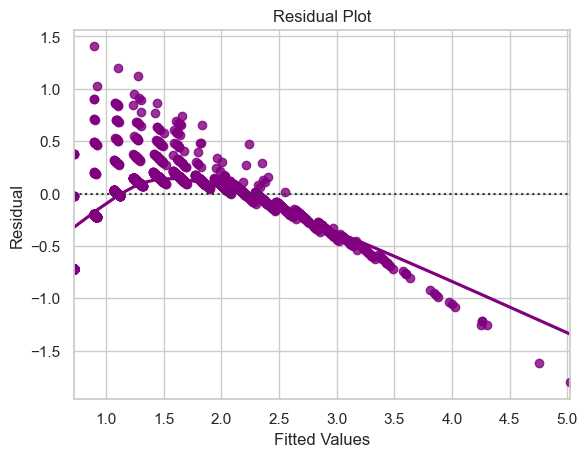

In [125]:
sns.set_style("whitegrid")
sns.residplot(x=fitted, y=residual, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()


<br/>
<font size = 4>Test for  Normality</font> 

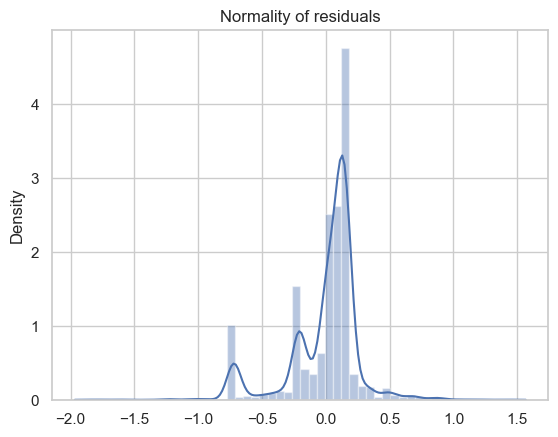

In [126]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

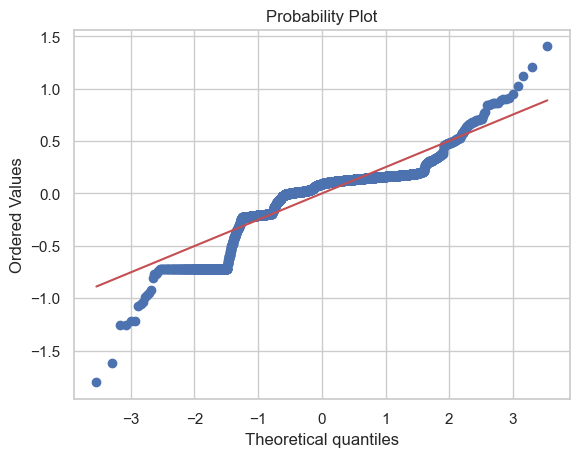

In [127]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

In [38]:
stats.shapiro(residual)

ShapiroResult(statistic=0.8332620859146118, pvalue=0.0)

<font size = 4>Test of Homoscedasticity</font>

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals have hetroscedasticity

In [128]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, x_train3)
lzip(name, test)

[('F statistic', 0.9650156763062934), ('p-value', 0.7687919240761768)]

<font size = 3>Observation</font>

Since p-value > 0.05 we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.

## Decision Tree

In [157]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [47]:
model = DecisionTreeRegressor(random_state=1)

In [48]:
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [151]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_regression_model(model, X_test, y_test):
    """
    Evaluates a regression model using common metrics.

    Args:
        model: The trained regression model.
        X_test: Test features.
        y_test: True values for the test set.

    Returns:
        MAE, MSE, RMSE: Mean Absolute Error, Mean Squared Error, Root Mean Squared Error.
    """
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return mae, mse, rmse


In [152]:
from sklearn.metrics import mean_squared_error, r2_score

def get_regression_metrics(model):
    '''
    model: regressor to predict values of X

    '''

    pred_train = model.predict(X_train)  # Predict on training set
    pred_test = model.predict(X_test)  # Predict on test set

    print("R-squared on training set: ", r2_score(y_train, pred_train))
    print("R-squared on test set: ", r2_score(y_test, pred_test))
    # print("Mean Squared Error on training set: ", mean_squared_error(y_train, pred_train))
    # print("Mean Squared Error on test set: ", mean_squared_error(y_test, pred_test))
    # Add more regression metrics as needed


In [51]:
# Usage
mae, mse, rmse = evaluate_regression_model(model, X_test, y_test)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 0.1859404160758399, MSE: 0.0835105456240472, RMSE: 0.28898191227834175


In [52]:
get_regression_metrics(model)

R-squared on training set:  1.0
R-squared on test set:  0.7908469098828954


#### Vizualize the Tree

In [75]:
feature_names = x.columns  # Get the list of column names as feature names

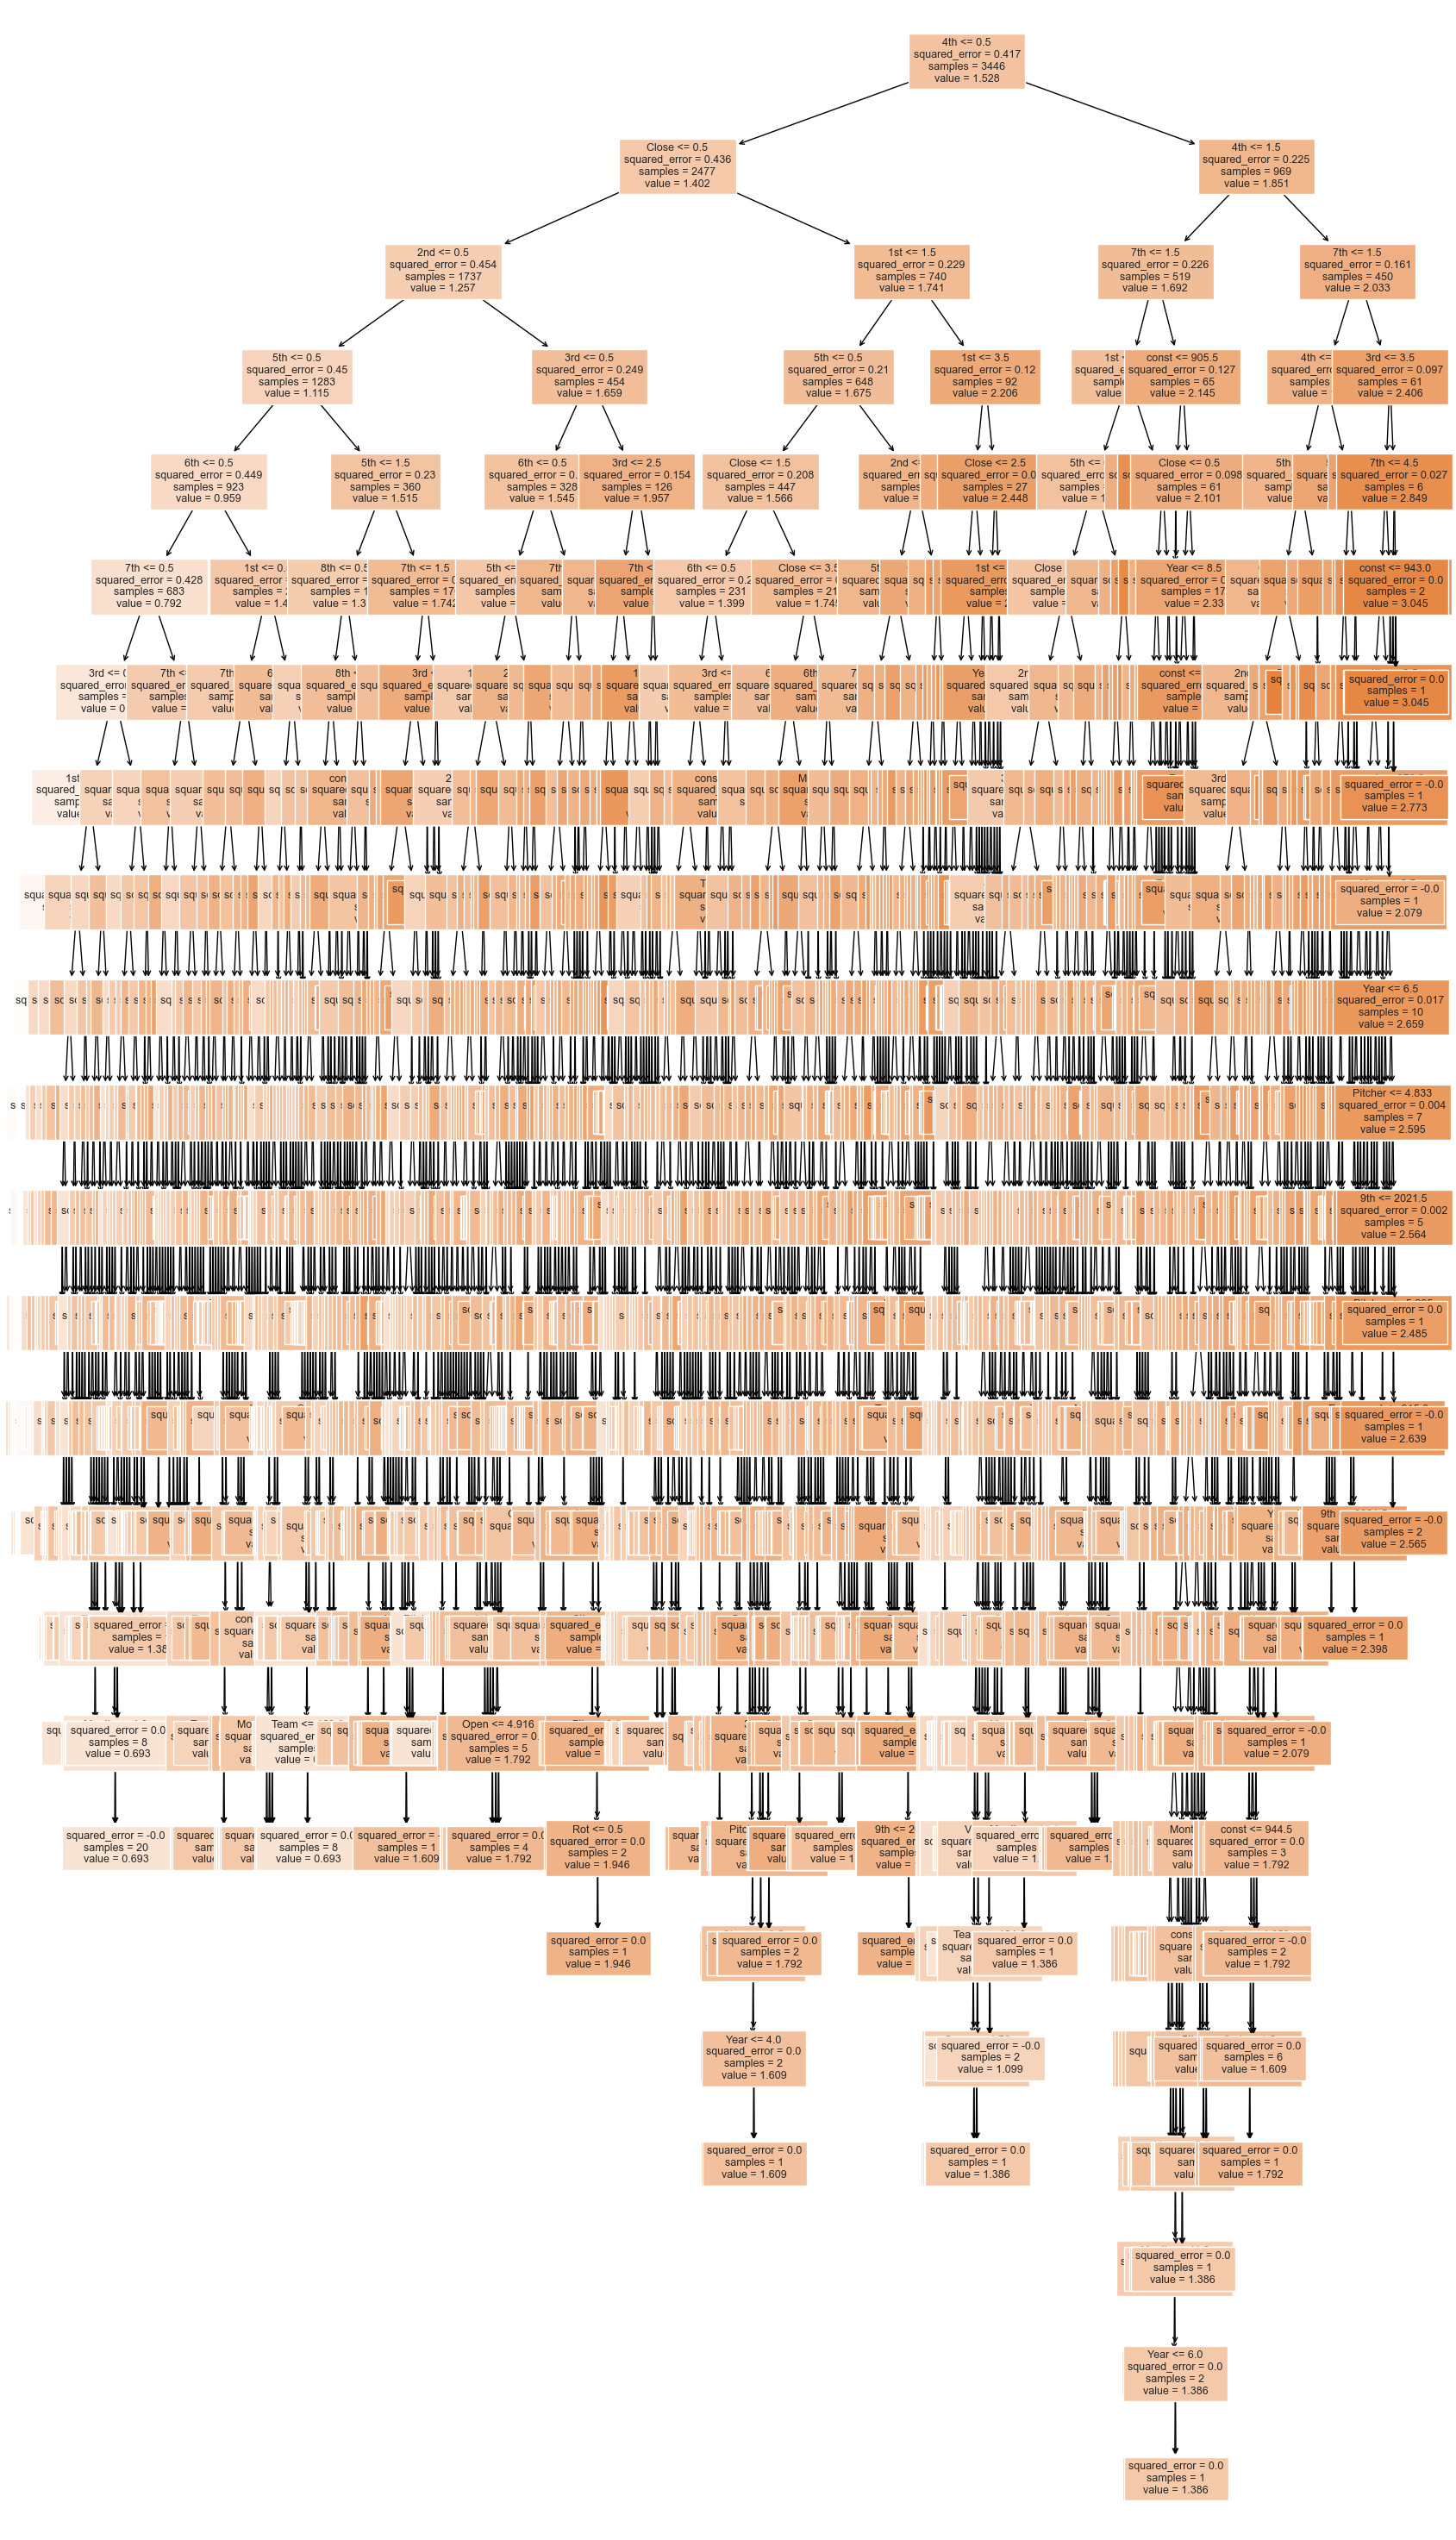

In [76]:
plt.figure(figsize=(20,38))
out = tree.plot_tree(model,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()

#### pre pruning

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import numpy as np

# Choose the type of regressor
regressor = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(1, 10),
    'criterion': ['mse', 'friedman_mse', 'mae'],  # Different criterion for regression
    'splitter': ['best', 'random'],
    'min_impurity_decrease': [0.000001, 0.00001, 0.0001],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define the scoring metric (R-squared in this case for regression)
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(regressor, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the regressor to the best combination of parameters
regressor = grid_obj.best_estimator_

# Fit the best algorithm to the data
regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='friedman_mse', max_depth=9,
                      max_features='auto', min_impurity_decrease=1e-06,
                      random_state=1)

In [54]:
mae, mse, rmse = evaluate_regression_model(regressor, X_test, y_test)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 0.24013942920647918, MSE: 0.09735838486533079, RMSE: 0.3120230518172188


In [55]:
get_regression_metrics(regressor)

R-squared on training set:  0.8679777980233213
R-squared on test set:  0.7561648425210297


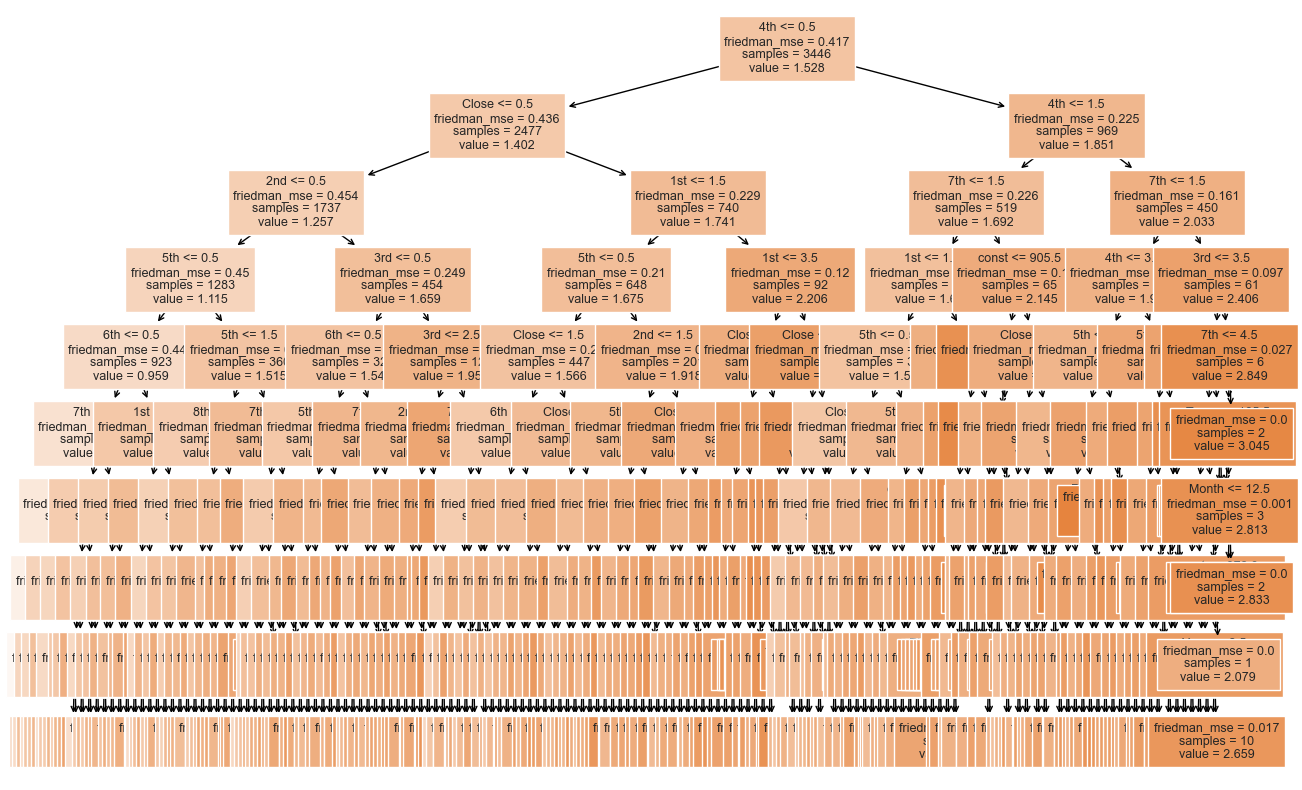

In [80]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(regressor,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

plt.show()


#### post pruning

In [81]:
clf=DecisionTreeRegressor(random_state=1)
path=clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities

In [82]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000,-0.000
1,0.000,-0.000
2,0.000,-0.000
3,0.000,-0.000
4,0.000,-0.000
...,...,...
1566,0.021,0.289
1567,0.023,0.313
1568,0.029,0.341
1569,0.035,0.377


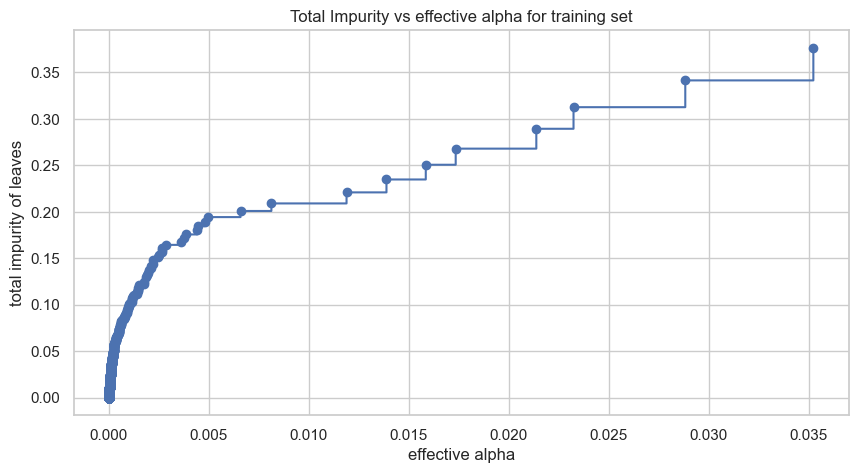

In [83]:
fig,ax =plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1],impurities[:-1],marker='o',drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [84]:
clfs=[]
for ccp_alpha in ccp_alphas:
  clf=DecisionTreeRegressor(random_state=1,ccp_alpha=ccp_alpha)
  clf.fit(X_train,y_train)
  clfs.append(clf)
print("Number of Nodes in the last tree is:{} with ccp_alpha: {}".format(
    clfs[-1].tree_.node_count,ccp_alphas[-1]))

Number of Nodes in the last tree is:1 with ccp_alpha: 0.04071797189419318


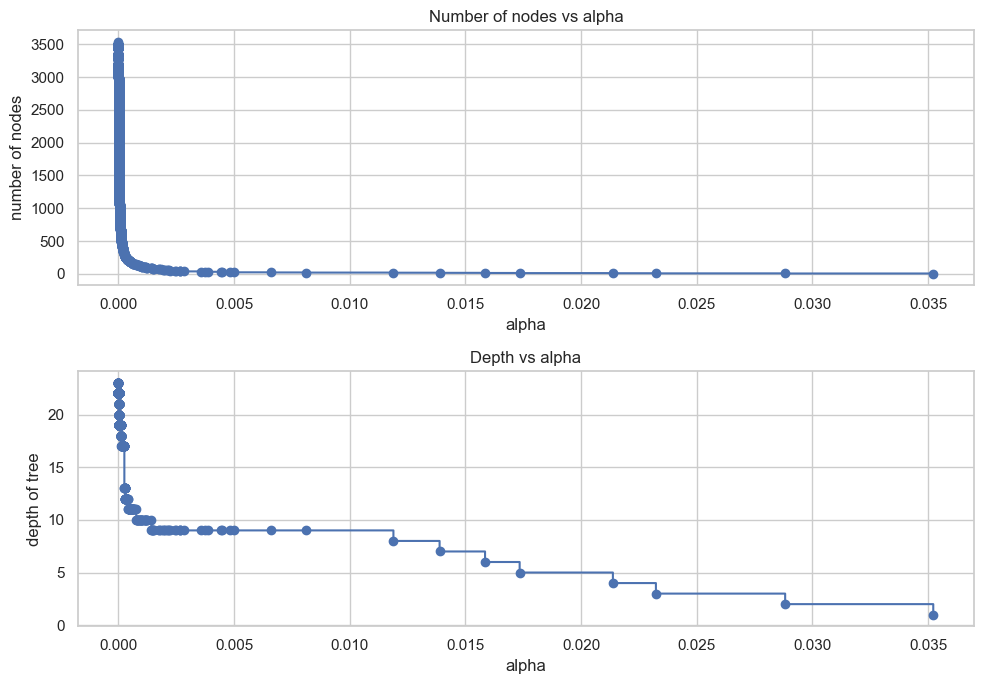

In [85]:
clfs=clfs[:-1]
ccp_alphs=ccp_alphas[:-1]

node_counts=[clf.tree_.node_count for clf in clfs]
depth=[clf.tree_.max_depth for clf in clfs]
fig,ax=plt.subplots(2,1,figsize=(10,7))
ax[0].plot(ccp_alphs,node_counts,marker='o',drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphs,depth,marker='o',drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [86]:
from sklearn.metrics import r2_score


r2_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    r2_train.append(r2_score(y_train, pred_train))



In [87]:
from sklearn.metrics import r2_score

r2_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    r2_test.append(r2_score(y_test, pred_test))



In [88]:
train_scores=[clf.score(X_train,y_train) for clf in clfs]
test_scores=[clf.score(X_test,y_test) for clf in clfs]

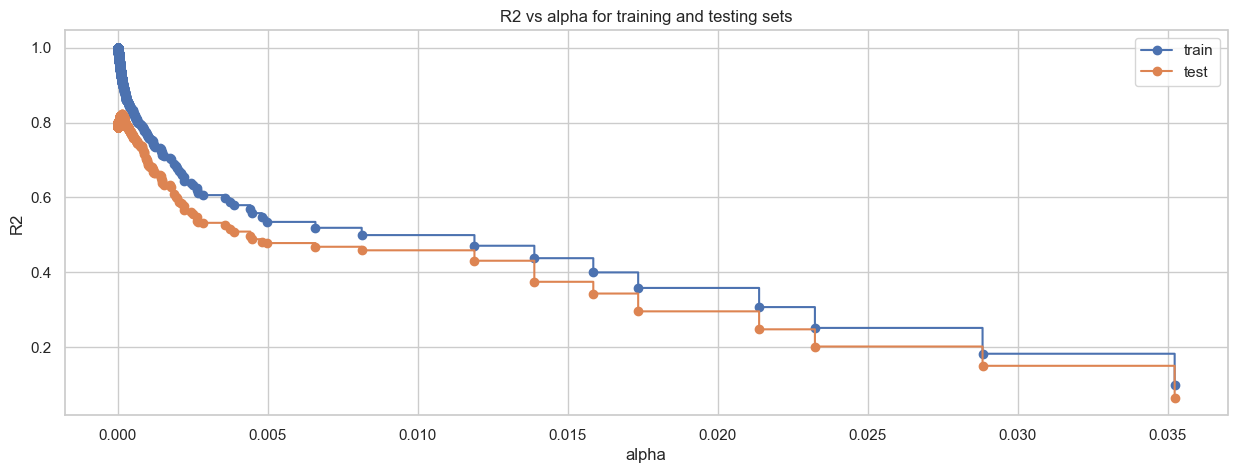

In [89]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("R2")
ax.set_title("R2 vs alpha for training and testing sets")
ax.plot(ccp_alphas[:-1], r2_train, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], r2_test, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()


In [90]:
index_best_model = np.argmax(r2_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeRegressor(ccp_alpha=0.00013565519365229785, random_state=1)


In [91]:
best_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.00013565519365229785, random_state=1)

In [92]:
mae, mse, rmse = evaluate_regression_model(best_model, X_test, y_test)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 0.19237638739808288, MSE: 0.07070829708061296, RMSE: 0.2659103177400474


In [93]:
get_regression_metrics(best_model)

R-squared on training set:  0.9119399477381864
R-squared on test set:  0.8229102837154744


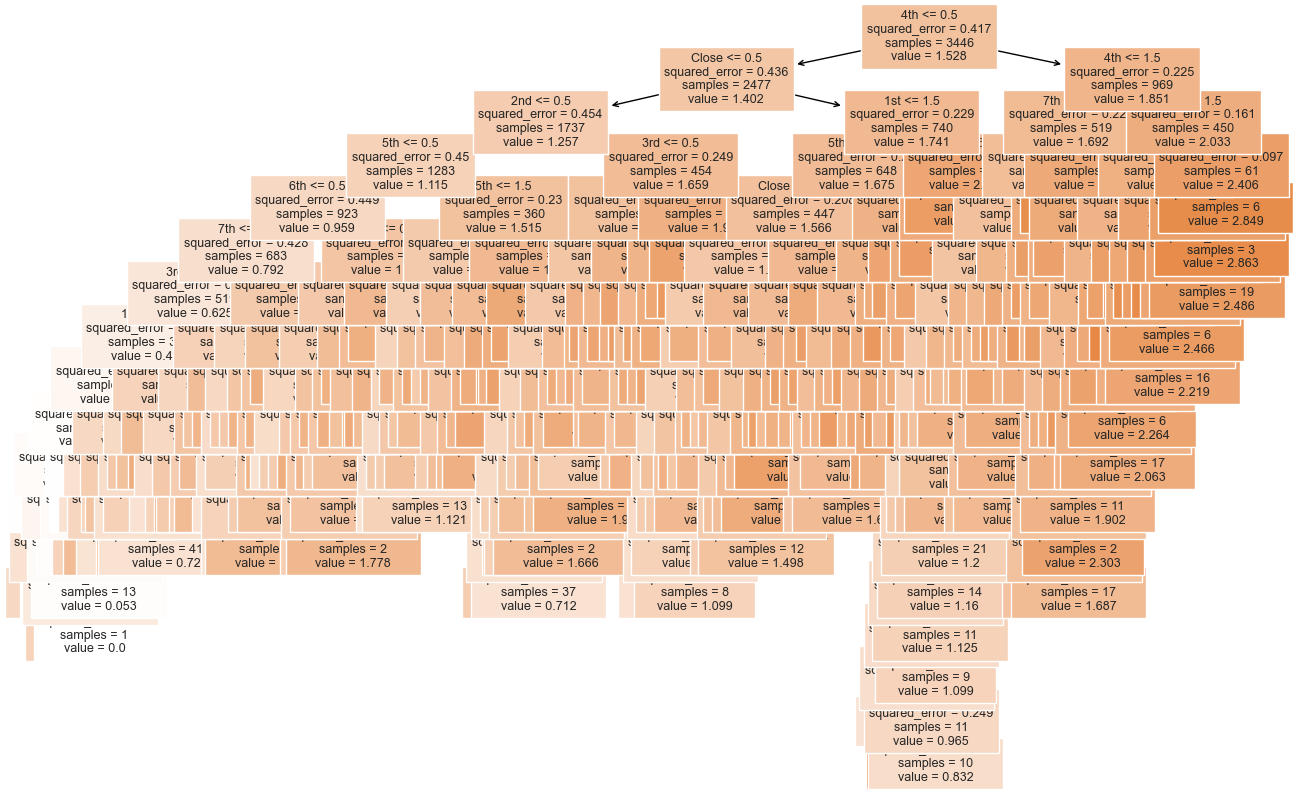

In [94]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(best_model,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

plt.show()


## Random Forest

In [111]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
rf=RandomForestRegressor(random_state=1)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [113]:
mae, mse, rmse = evaluate_regression_model(rf, X_test, y_test)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 0.13546470272446295, MSE: 0.03786116030353808, RMSE: 0.1945794447097074


In [114]:
get_regression_metrics(rf)

R-squared on training set:  0.986682952005245
R-squared on test set:  0.9051763030198212


##### Tunning Random forest Regressor

In [116]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Choose the type of classifier.
rf_estimator = RandomForestRegressor(random_state=1)

# Define the grid of parameters to sample from
parameters = {
    'n_estimators': [110, 251, 501],
    'min_samples_leaf': np.arange(1, 6, 1),
    'max_features': [0.7, 0.9, 'log2', 'sqrt'],
    'max_samples': [0.7, 0.9, None]  # None: 100% of the rows
}

# Run the RandomizedSearchCV
random_search = RandomizedSearchCV(rf_estimator, parameters, scoring='r2', cv=5, n_iter=10, random_state=1)
random_search.fit(X_train, y_train)

# Set the best estimator from the search
rf_estimator = random_search.best_estimator_

# Fit the best estimator to the data
rf_estimator.fit(X_train, y_train)


RandomForestRegressor(max_features=0.7, min_samples_leaf=2, n_estimators=501,
                      random_state=1)

In [117]:
mae, mse, rmse = evaluate_regression_model(rf_estimator, X_test, y_test)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 0.13776933096480548, MSE: 0.037317569743578534, RMSE: 0.19317756014500892


In [118]:
get_regression_metrics(rf_estimator)

R-squared on training set:  0.9763881334866933
R-squared on test set:  0.9065377316217353


## Bagging Regressor

In [148]:
from sklearn.ensemble import BaggingRegressor

In [149]:
bagging=BaggingRegressor(random_state=1)
bagging.fit(X_train,y_train)

BaggingRegressor(random_state=1)

In [153]:
mae, mse, rmse = evaluate_regression_model(bagging, X_test, y_test)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 0.14277296622920943, MSE: 0.04298855948719555, RMSE: 0.20733682617228313


In [155]:
get_regression_metrics(bagging)

R-squared on training set:  0.97999036676004
R-squared on test set:  0.8923346747498573


#### Tunning Bagging Regressor

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
#grid search for bagging classifier
cl1=DecisionTreeRegressor(random_state=1)
param_grid={'base_estimator':[cl1],
            'n_estimators':[5,7,15,51,101],
            'max_features':[0.7,0.8,0.9,1]
            }

grid=GridSearchCV(BaggingRegressor(random_state=1,bootstrap=True),param_grid=param_grid,scoring='r2',cv=5)
grid.fit(X_train,y_train)

##getting the best estimator
bagging_estimator=grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=1),
                 max_features=0.9, n_estimators=51, random_state=1)

In [161]:
mae, mse, rmse = evaluate_regression_model(bagging_estimator, X_test, y_test)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 0.16300304200783391, MSE: 0.04740982931526831, RMSE: 0.21773798317075574


In [162]:
get_regression_metrics(bagging_estimator)

R-squared on training set:  0.9821799330645276
R-squared on test set:  0.8812615553028127


## Boosting Models

#### AdaBoost Regressor

In [135]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

# Assuming 'ada_model' is your AdaBoost model
ada_model = AdaBoostRegressor(random_state=1)

# Fit the AdaBoost model on training data
ada_model.fit(X_train, y_train)


AdaBoostRegressor(random_state=1)

In [136]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

# Assuming 'ada_model' is your AdaBoost model
ada_model = AdaBoostRegressor(random_state=1)

# Fit the AdaBoost model on training data
ada_model.fit(X_train, y_train)

# Calculate r2 for training data with AdaBoost
r2_train = r2_score(y_train, ada_model.predict(X_train))

# Calculate r2 for testing data with AdaBoost
r2_test = r2_score(y_test, ada_model.predict(X_test))

# Print the results
print("R2 on Training Data:", r2_train)
print("R2 on Testing Data:", r2_test)


R2 on Training Data: 0.6293358899532538
R2 on Testing Data: 0.6100435566208384


Hyperparametere Tuning

In [137]:
from sklearn.model_selection import RandomizedSearchCV
# Create AdaBoost classifier
ada_model = AdaBoostRegressor(random_state=1)

# Define hyperparameter distribution
param_dist = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(ada_model, param_distributions=param_dist, n_iter=10, scoring='r2', cv=3, random_state=1)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_random = random_search.best_params_

# Fit AdaBoost with the best hyperparameters on training data
best_ada_model_random = AdaBoostRegressor(**best_params_random, random_state=1)
best_ada_model_random.fit(X_train, y_train)

# Calculate r2 for training data with tuned AdaBoost
r2_train_tuned_random = r2_score(y_train, best_ada_model_random.predict(X_train))

# Calculate r2 for testing data with tuned AdaBoost
r2_test_tuned_random = r2_score(y_test, best_ada_model_random.predict(X_test))

# Print the results
print("R2 on Training Data (Tuned AdaBoost - Randomized Search):", r2_train_tuned_random)
print("R2 on Testing Data (Tuned AdaBoost - Randomized Search):", r2_test_tuned_random)


R2 on Training Data (Tuned AdaBoost - Randomized Search): 0.6366637101731569
R2 on Testing Data (Tuned AdaBoost - Randomized Search): 0.6095614304333328


#### Gradient Boosting Regressor

In [143]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming 'gb_model' is your Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=1)

# Fit the Gradient Boosting model on training data
gb_model.fit(X_train, y_train)

# Calculate recall for training data with Gradient Boosting
r2_train_gb = r2_score(y_train, gb_model.predict(X_train))

# Calculate recall for testing data with Gradient Boosting
r2_test_gb = r2_score(y_test, gb_model.predict(X_test))

# Print the results
print("R2 on Training Data (Gradient Boosting):", r2_train_gb)
print("R2 on Testing Data (Gradient Boosting):", r2_test_gb)


R2 on Training Data (Gradient Boosting): 0.9225518304194145
R2 on Testing Data (Gradient Boosting): 0.9112431811848904


Hyperparametere Tuning

In [139]:
# Create Gradient Boosting classifier
gb_model = GradientBoostingRegressor(random_state=1)

# Define hyperparameter distribution
param_dist_gb = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7, 9],
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search_gb = RandomizedSearchCV(gb_model, param_distributions=param_dist_gb, n_iter=10, scoring='r2', cv=3, random_state=1)
random_search_gb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_random_gb = random_search_gb.best_params_

# Fit Gradient Boosting with the best hyperparameters on training data
best_gb_model_random = GradientBoostingRegressor(**best_params_random_gb, random_state=1)
best_gb_model_random.fit(X_train, y_train)

# Calculate recall for training data with tuned Gradient Boosting
r2_train_tuned_random_gb = r2_score(y_train, best_gb_model_random.predict(X_train))

# Calculate recall for testing data with tuned Gradient Boosting
r2_test_tuned_random_gb = r2_score(y_test, best_gb_model_random.predict(X_test))

# Print the results
print("Recall on Training Data (Tuned Gradient Boosting - Randomized Search):", r2_train_tuned_random_gb)
print("Recall on Testing Data (Tuned Gradient Boosting - Randomized Search):", r2_test_tuned_random_gb)


Recall on Training Data (Tuned Gradient Boosting - Randomized Search): 0.9676541036266035
Recall on Testing Data (Tuned Gradient Boosting - Randomized Search): 0.949674620324496


#### XGBoost Regressor

In [124]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [140]:
from xgboost import XGBRegressor

# Assuming 'xgb_model' is your XGBoost model
xgb_model = XGBRegressor(random_state=1)

# Fit the XGBoost model on training data
xgb_model.fit(X_train, y_train)

# Calculate recall for training data with XGBoost
r2_train_xgb = r2_score(y_train, xgb_model.predict(X_train))

# Calculate recall for testing data with XGBoost
r2_test_xgb = r2_score(y_test, xgb_model.predict(X_test))

# Print the results
print("R2 on Training Data (XGBoost):", r2_train_xgb)
print("R2 on Testing Data (XGBoost):", r2_test_xgb)


R2 on Training Data (XGBoost): 0.9895504859948858
R2 on Testing Data (XGBoost): 0.9411251446188725


Hyperparametere Tuning

In [141]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Create XGBoost regressor
xgb_model = XGBRegressor(random_state=1)

# Define hyperparameter distribution
param_dist_xgb = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 1.0],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1.0],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1.0],
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_dist_xgb, n_iter=100, scoring='r2', cv=3, random_state=1)
random_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_random_xgb = random_search_xgb.best_params_

# Fit XGBoost with the best hyperparameters on training data
best_xgb_model_random = XGBRegressor(**best_params_random_xgb, random_state=1)
best_xgb_model_random.fit(X_train, y_train)

# Calculate R2 for training data with tuned XGBoost
r2_train_tuned_random_xgb = r2_score(y_train, best_xgb_model_random.predict(X_train))

# Calculate R2 for testing data with tuned XGBoost
r2_test_tuned_random_xgb = r2_score(y_test, best_xgb_model_random.predict(X_test))

# Print the results
print("R2 on Training Data (Tuned XGBoost - Randomized Search):", r2_train_tuned_random_xgb)
print("R2 on Testing Data (Tuned XGBoost - Randomized Search):", r2_test_tuned_random_xgb)


R2 on Training Data (Tuned XGBoost - Randomized Search): 0.9747143016603742
R2 on Testing Data (Tuned XGBoost - Randomized Search): 0.9542208798451792


#### Gradient Feature Importance

In [144]:
# Get feature importances
feature_importances = gb_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importance:")
print(importance_df)

Feature Importance:
                 Feature  Importance
4                    1st       0.130
6                    3rd       0.127
8                    5th       0.126
9                    6th       0.119
7                    4th       0.111
10                   7th       0.108
11                   8th       0.108
5                    2nd       0.102
12                   9th       0.070
19                 Month       0.000
3                  Close       0.000
20                   Day       0.000
13               Team_AL       0.000
18                  Year       0.000
1                     VH       0.000
14              Team_CUB       0.000
15               Team_NL       0.000
16   Pitcher_Left-Handed       0.000
17  Pitcher_Right-Handed       0.000
2                   Open       0.000
0                    Rot       0.000


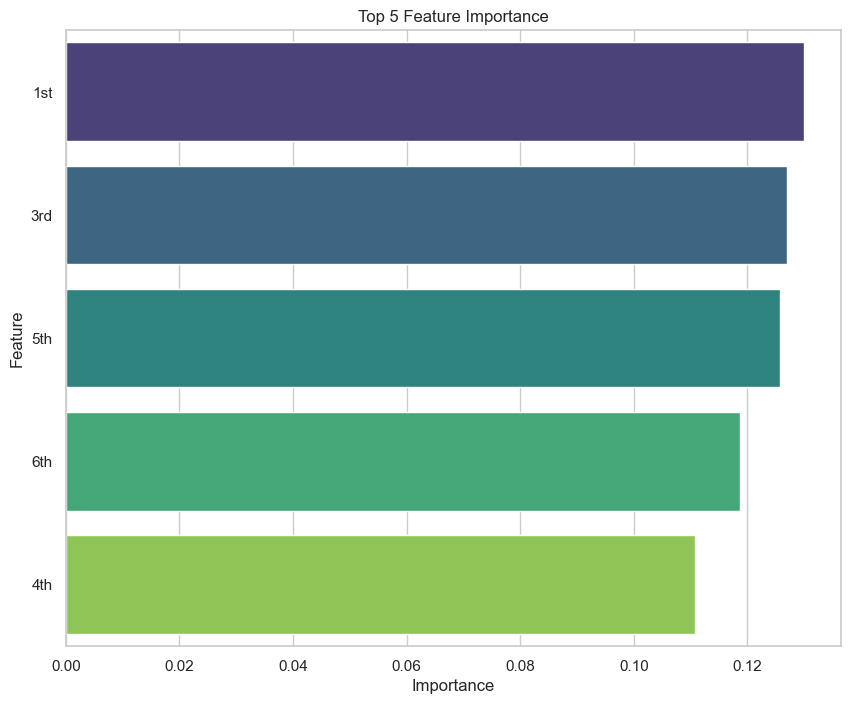

In [146]:
# Sort the importance DataFrame by Importance column in descending order
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_5_features = importance_df_sorted['Feature'].head(5)
top_5_importance_values = importance_df_sorted['Importance'].head(5)

# Choose a color palette with distinct colors
color_palette = sns.color_palette("viridis", len(top_5_features))

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=top_5_importance_values, y=top_5_features, palette=color_palette)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importance')

plt.show()


In [165]:
# Define the data for each classifier
data = {
    "Regression": ["Linear Regression", "Decision Tree", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)",
                   "Random Forest","Random Forest Tunning","Bagging Regressor","Bagging Regressor Tunning",
                   "AdaBoost Regressor","AdaBoost Regressor Tunning", "Gradient Boost Regressor",
                   "Gradient Boost Regressor Tunning", "XGBoost Regressor","XGBoost Regressor Tunning"],
                   
    "R-square Train": [0.817, 1.0, 0.867, 0.911, 0.986, 0.976, 0.979, 0.982, 0.629,0.636,0.922,0.967,0.989,0.974],
    "R-square Test": [0.816, 0.790, 0.756, 0.822, 0.905, 0.906, 0.892, 0.881,0.610,0.609,0.911,0.949,0.941,0.954],
    
}

# Create DataFrame
df_summary = pd.DataFrame(data)

# Set Classifier column as index
df_summary.set_index("Regression", inplace=True)

# Transpose the DataFrame
df_summary = df_summary.T
df_summary


Regression,Linear Regression,Decision Tree,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning),Random Forest,Random Forest Tunning,Bagging Regressor,Bagging Regressor Tunning,AdaBoost Regressor,AdaBoost Regressor Tunning,Gradient Boost Regressor,Gradient Boost Regressor Tunning,XGBoost Regressor,XGBoost Regressor Tunning
R-square Train,0.817,1.000,0.867,0.911,0.986,0.976,0.979,0.982,0.629,0.636,0.922,0.967,0.989,0.974
R-square Test,0.816,0.790,0.756,0.822,0.905,0.906,0.892,0.881,0.610,0.609,0.911,0.949,0.941,0.954


### Business Conclusion



**Model Choice:**

The analysis of the basketball dataset using Gradient Boosting revealed that scores in the early quarters (1st and 2nd) are crucial, along with maintaining consistency throughout the game, particularly in the later quarters (3rd to 9th). Strategies aimed at optimizing performance during these periods can significantly impact game outcomes.

**Business Focus:**  

the business focus should align with the organization's goals, priorities, and competitive landscape, leveraging data-driven insights to gain a competitive edge, enhance performance, and drive sustainable success in the basketball industry.



**Feature Impruvement:** 
 
 Always check and improve using new data and what the business needs to stay accurate.